In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [299]:
def theta(df):
    delta_x = df['tip_pos_x'] - df['base_pos_x']
    distance = np.sqrt((df['tip_pos_y'] - df['base_pos_y'])**2 +  (df['tip_pos_x'] - df['base_pos_x'])**2)
    return np.arcsin(delta_x / distance) * (180 / np.pi)

In [300]:
def remove_transiet(df, thres=0.1, step=10):
    times = df['time']
    thetas = df['theta']
    cleaned_times = []
    prevTime = times[0]
    prevTheta = thetas[0]
    for theta, time in zip(thetas[::step], times[::step]):
        if abs((theta - prevTheta) / (time - prevTime)) < thres:
            cleaned_times.append(time)
        prevTheta = theta
        prevTime = time
    return df.loc[df['time'].isin(cleaned_times)]

In [301]:
def averageSS(df):
    goodTimes = []
    sumHigh = 0
    count = 0
    for theta, time in zip(thetas, times):
        if theta > np.mean(thetas):
            sumHigh += theta
            count += 1
            goodTimes.append(time)

    return sumHigh / count, np.mean(df.loc[df['time'].isin(goodTimes)]['flex']), np.mean(df.loc[df['time'].isin(goodTimes)]['flex^2'])

In [302]:
def rmse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [316]:
def pipeline(pwms):
    pwms = [pwm.head(2004) for pwm in pwms] # fixes data appending old files
    pwms_clean = []
    for pwm in pwms:
        pwm['theta'] = theta(pwm) # add theta
        pwm['flex'] = pwm['left_flex'] # rename left_flex to flex
        pwm['flex^2'] = pwm['flex']**2 # add flex^2
        pwm.drop(columns=['left_flex', 'right_flex', 'right_pwm'], inplace=True)
        pwms_clean.append(remove_transiet(pwm))
    return pwms, pwms_clean

In [317]:
pwm20a = pd.read_csv('vision_fix20_03_12_2019_04_12_54.csv')
pwm20b = pd.read_csv('vision_fix20_03_12_2019_04_13_15.csv')
pwm20c = pd.read_csv('vision_fix20_03_12_2019_04_13_36.csv')
pwm20d = pd.read_csv('vision_fix20_03_12_2019_04_13_57.csv')
pwm20e = pd.read_csv('vision_fix20_03_12_2019_04_14_19.csv')

pwm40a = pd.read_csv('vision_fix40_03_12_2019_04_14_40.csv')
pwm40b = pd.read_csv('vision_fix40_03_12_2019_04_15_01.csv')
pwm40c = pd.read_csv('vision_fix40_03_12_2019_04_15_22.csv')
pwm40d = pd.read_csv('vision_fix40_03_12_2019_04_15_43.csv')
pwm40e = pd.read_csv('vision_fix40_03_12_2019_04_16_04.csv')

pwm60a = pd.read_csv('vision_fix60_03_12_2019_04_16_25.csv')
pwm60b = pd.read_csv('vision_fix60_03_12_2019_04_16_46.csv')
pwm60c = pd.read_csv('vision_fix60_03_12_2019_04_17_07.csv')
pwm60d = pd.read_csv('vision_fix60_03_12_2019_04_17_28.csv')
pwm60e = pd.read_csv('vision_fix60_03_12_2019_04_17_49.csv')

pwm80a = pd.read_csv('vision_fix80_03_12_2019_04_18_10.csv')
pwm80b = pd.read_csv('vision_fix80_03_12_2019_04_18_32.csv')
pwm80c = pd.read_csv('vision_fix80_03_12_2019_04_18_53.csv')
pwm80d = pd.read_csv('vision_fix80_03_12_2019_04_19_14.csv')
pwm80e = pd.read_csv('vision_fix80_03_12_2019_04_19_35.csv')

pwm100a = pd.read_csv('vision_fix100_03_12_2019_04_19_56.csv')
pwm100b = pd.read_csv('vision_fix100_03_12_2019_04_20_17.csv')
pwm100c = pd.read_csv('vision_fix100_03_12_2019_04_20_38.csv')
pwm100d = pd.read_csv('vision_fix100_03_12_2019_04_20_59.csv')
pwm100e = pd.read_csv('vision_fix100_03_12_2019_04_21_20.csv')

pwm120a = pd.read_csv('vision_fix120_03_12_2019_04_21_41.csv')
pwm120b = pd.read_csv('vision_fix120_03_12_2019_04_22_02.csv')
pwm120c = pd.read_csv('vision_fix120_03_12_2019_04_22_24.csv')
pwm120d = pd.read_csv('vision_fix120_03_12_2019_04_22_45.csv')
pwm120e = pd.read_csv('vision_fix120_03_12_2019_04_23_06.csv')

pwm140a = pd.read_csv('vision_fix140_03_12_2019_04_23_27.csv')
pwm140b = pd.read_csv('vision_fix140_03_12_2019_04_23_48.csv')
pwm140c = pd.read_csv('vision_fix140_03_12_2019_04_24_09.csv')
pwm140d = pd.read_csv('vision_fix140_03_12_2019_04_24_30.csv')
pwm140e = pd.read_csv('vision_fix140_03_12_2019_04_24_51.csv')

pwm160a = pd.read_csv('vision_fix160_03_12_2019_04_25_12.csv')
pwm160b = pd.read_csv('vision_fix160_03_12_2019_04_25_33.csv')
pwm160c = pd.read_csv('vision_fix160_03_12_2019_04_25_54.csv')
pwm160d = pd.read_csv('vision_fix160_03_12_2019_04_26_16.csv')
pwm160e = pd.read_csv('vision_fix160_03_12_2019_04_26_37.csv')

pwm180a = pd.read_csv('vision_fix180_03_12_2019_04_26_58.csv')
pwm180b = pd.read_csv('vision_fix180_03_12_2019_04_27_19.csv')
pwm180c = pd.read_csv('vision_fix180_03_12_2019_04_27_40.csv')
pwm180d = pd.read_csv('vision_fix180_03_12_2019_04_28_01.csv')
pwm180e = pd.read_csv('vision_fix180_03_12_2019_04_28_22.csv')

pwm200a = pd.read_csv('vision_fix200_03_12_2019_04_28_43.csv')
pwm200b = pd.read_csv('vision_fix200_03_12_2019_04_29_04.csv')
pwm200c = pd.read_csv('vision_fix200_03_12_2019_04_29_25.csv')
pwm200d = pd.read_csv('vision_fix200_03_12_2019_04_29_47.csv')
pwm200e = pd.read_csv('vision_fix200_03_12_2019_04_30_08.csv')

In [318]:
pwms = [pwm20a, pwm20b, pwm20c, pwm20d, pwm20e,
        pwm40a, pwm40b, pwm40c, pwm40d, pwm40e,
        pwm60a, pwm60b, pwm60c, pwm60d, pwm60e,
        pwm80a, pwm80b, pwm80c, pwm80d, pwm80e,
        pwm100a, pwm100b, pwm100c, pwm100d, pwm100e,
        pwm120a, pwm120b, pwm120c, pwm120d, pwm120e,
        pwm140a, pwm140b, pwm140c, pwm140d, pwm140e,
        pwm160a, pwm160b, pwm160c, pwm160d, pwm160e,
        pwm180a, pwm180b, pwm180c, pwm180d, pwm180e,
        pwm200a, pwm200b, pwm200c, pwm200d, pwm200e]

In [319]:
pwms, pwms_clean = pipeline(pwms)

/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Text(0, 0.5, 'theta (degrees)')

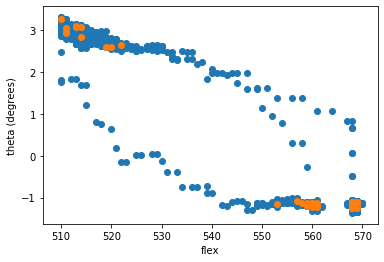

In [320]:
plt.scatter(pwms[4]['flex'], pwms[4]['theta'])
plt.scatter(pwms_clean[4]['flex'], pwms_clean[4]['theta'])
plt.xlabel('flex')
plt.ylabel('theta (degrees)')

In [327]:
all_flexs = []
all_thetas = []
for pwm in pwms_clean:
    all_flexs.extend(np.array(pwm[['flex', 'flex^2']]))
    all_thetas.extend(np.array(pwm['theta']))

In [328]:
model = LinearRegression().fit(all_flexs, all_thetas)

In [329]:
model.coef_, model.intercept_

(array([-1.05591989e+00,  9.33421143e-04]), 297.1056114257644)

In [331]:
predicted_thetas = model.predict(all_flexs)
rmse(all_thetas, predicted_thetas)

1.2786443942005423

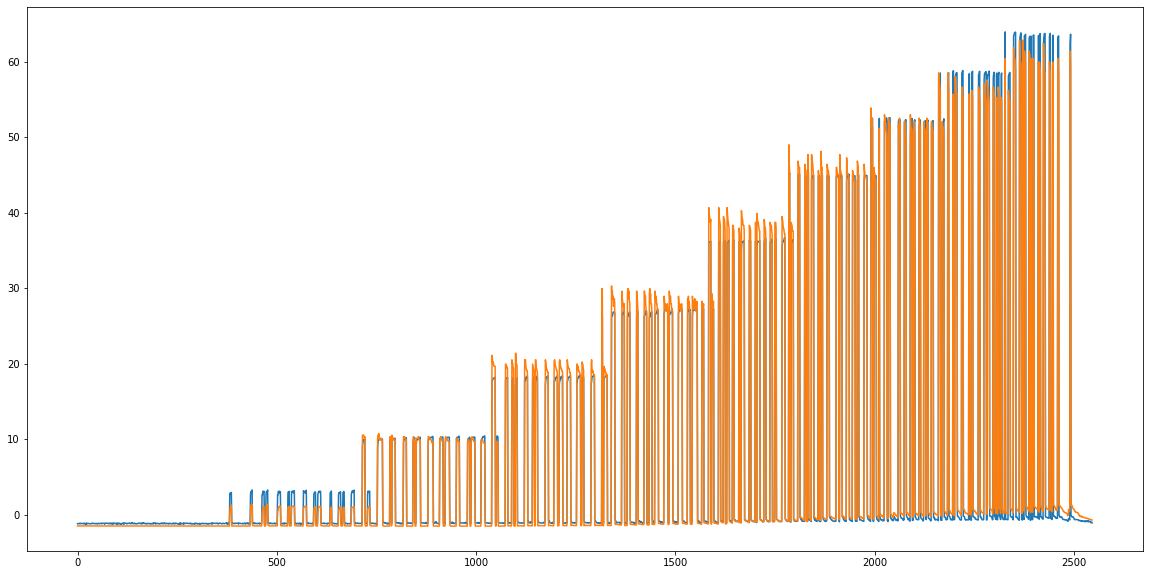

In [334]:
plt.figure(figsize=(20, 10))
plt.plot(all_thetas)
plt.plot(predicted_thetas)

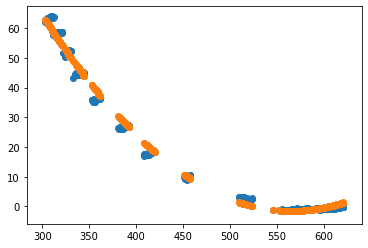

In [341]:
plt.scatter(np.array(all_flexs).T[0], all_thetas)
plt.scatter(np.array(all_flexs).T[0], predicted_thetas)

In [342]:
all_flexs = []
all_thetas = []
for pwm in pwms:
    all_flexs.extend(np.array(pwm[['flex', 'flex^2']]))
    all_thetas.extend(np.array(pwm['theta']))

In [343]:
predicted_thetas = model.predict(all_flexs)
rmse(all_thetas, predicted_thetas)

10.850059412722228

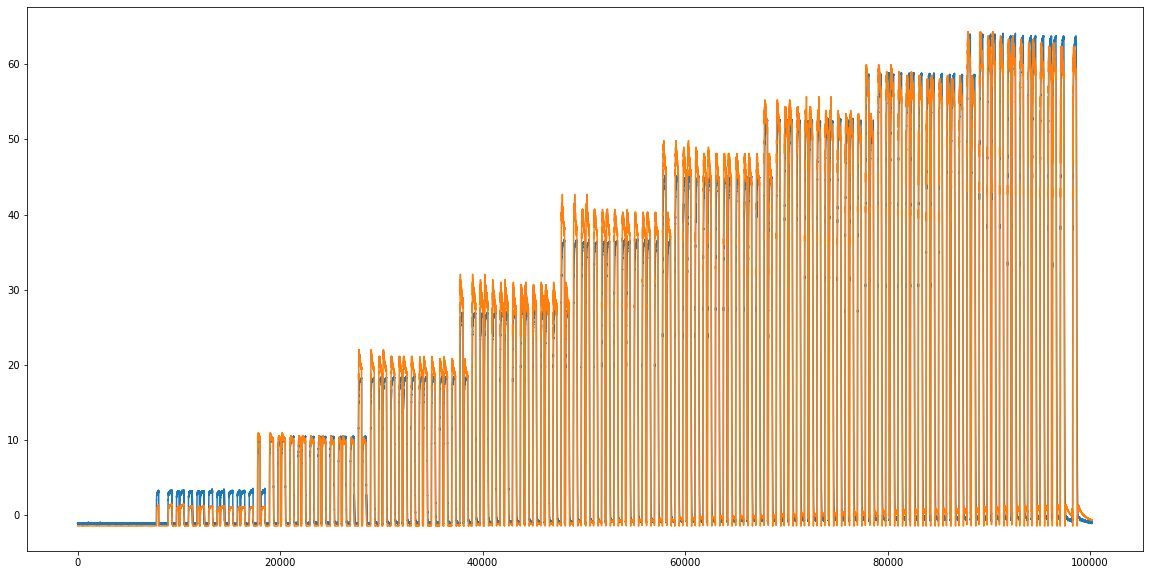

In [344]:
plt.figure(figsize=(20, 10))
plt.plot(all_thetas)
plt.plot(predicted_thetas)

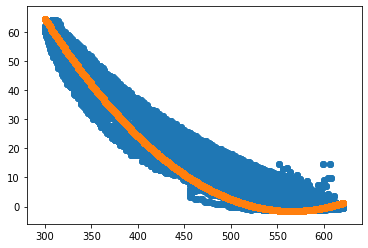

In [345]:
plt.scatter(np.array(all_flexs).T[0], all_thetas)
plt.scatter(np.array(all_flexs).T[0], predicted_thetas)

/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


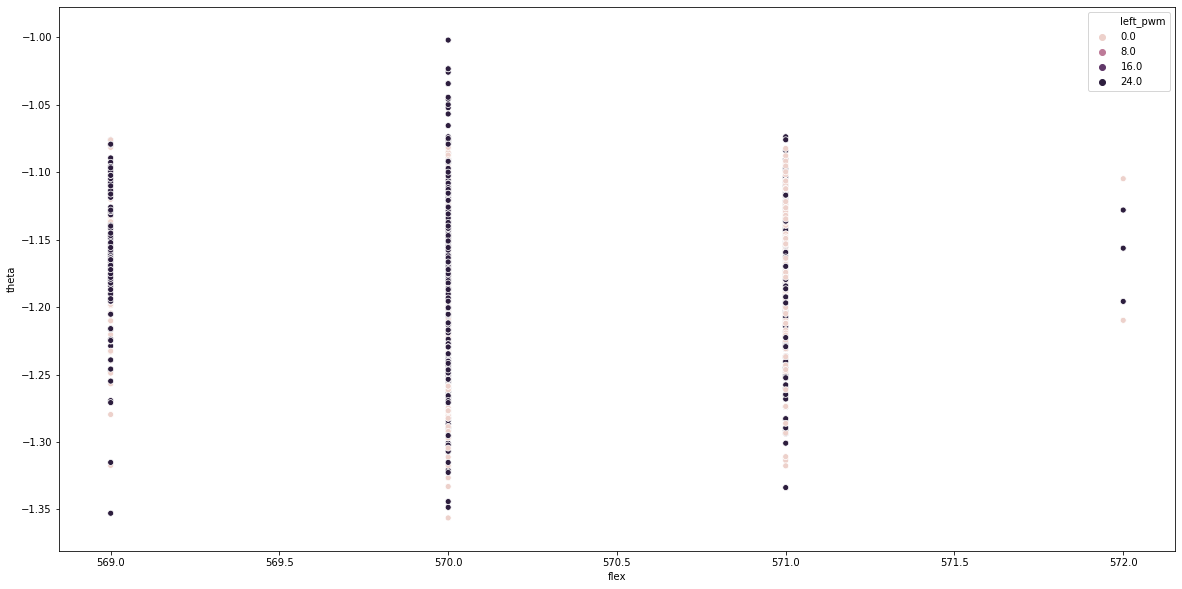

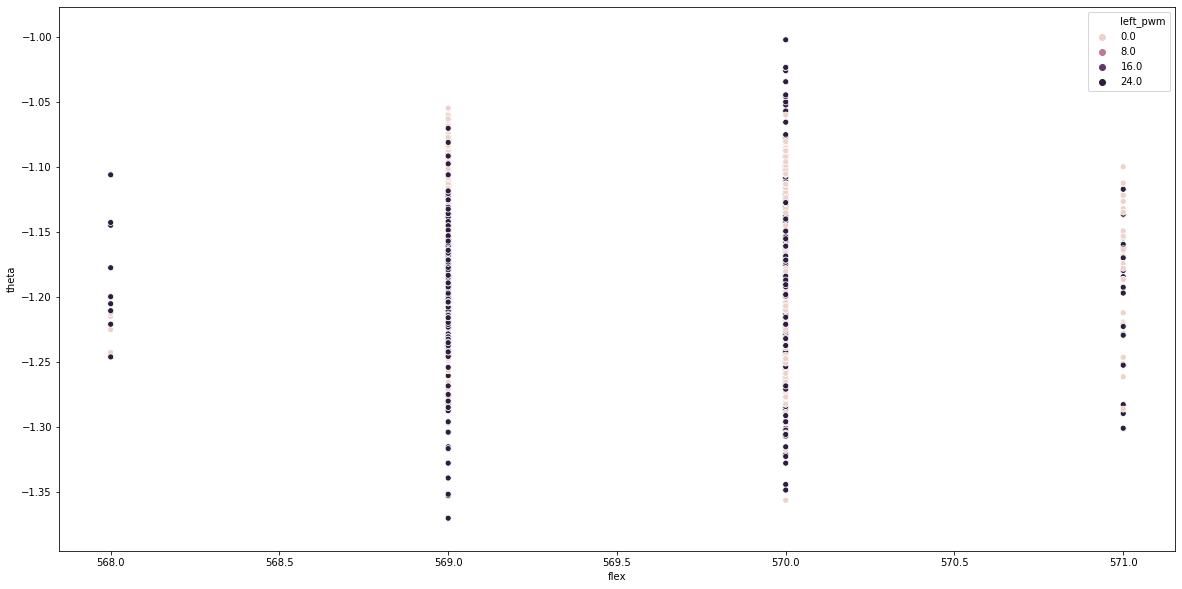

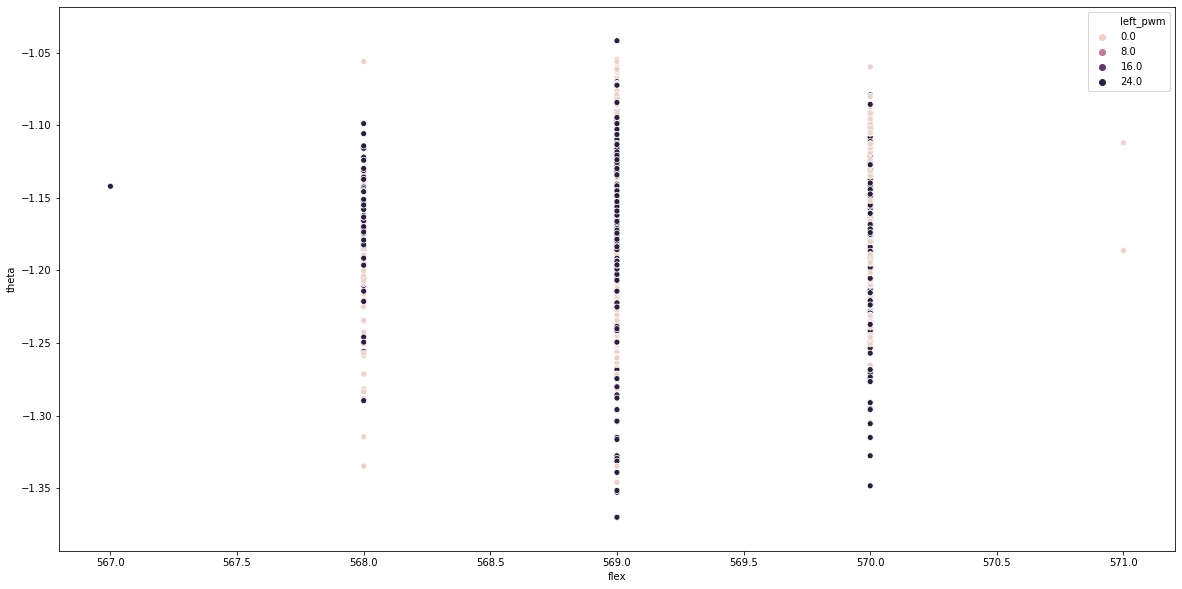

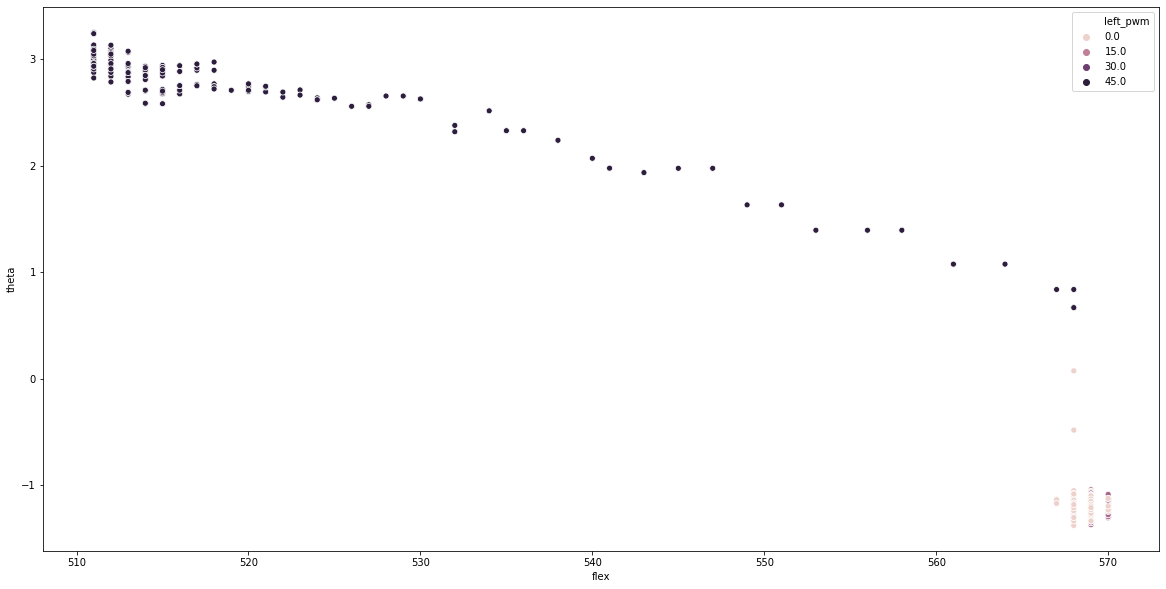

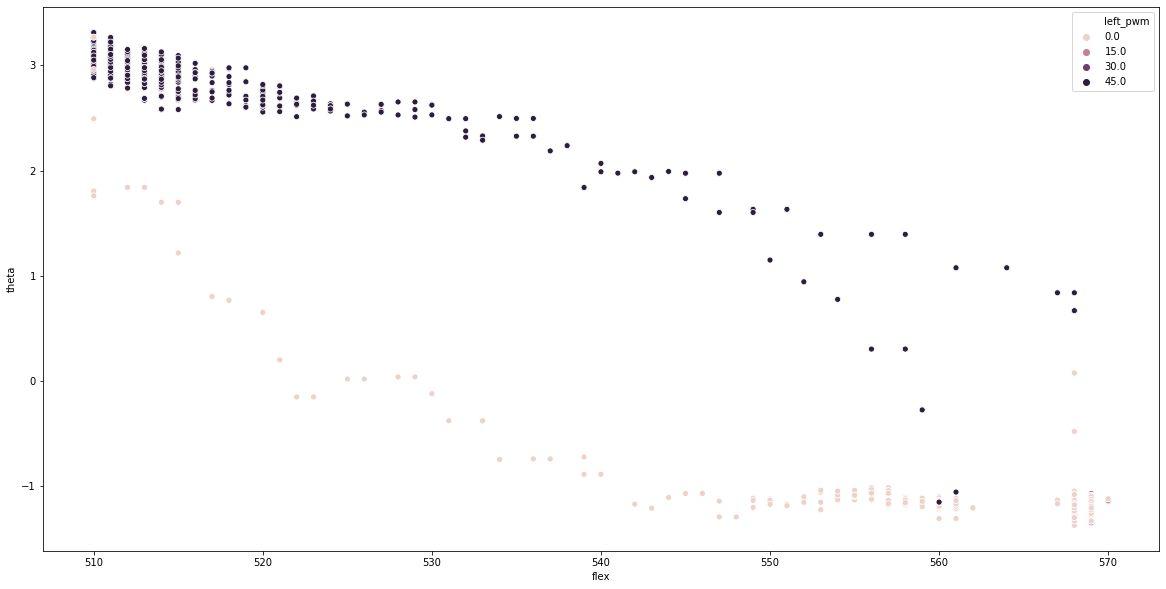

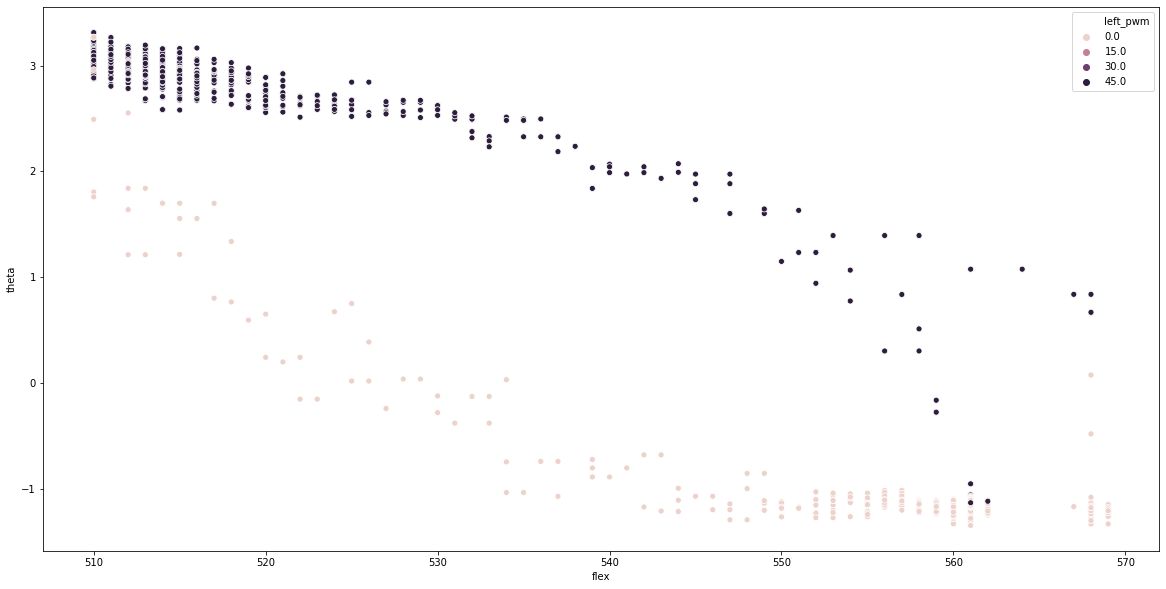

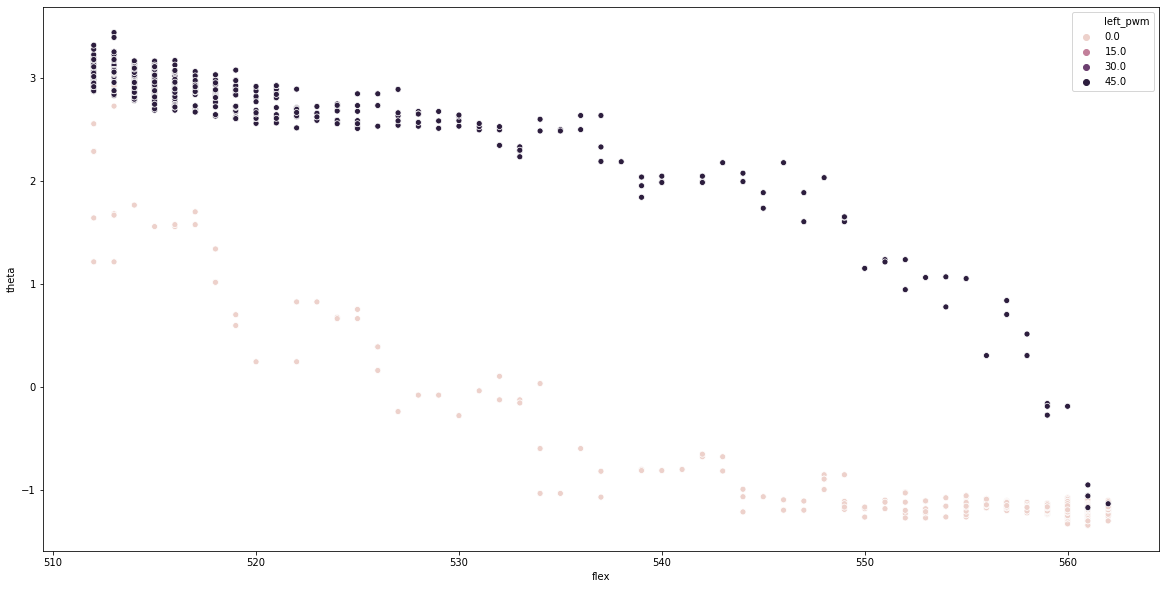

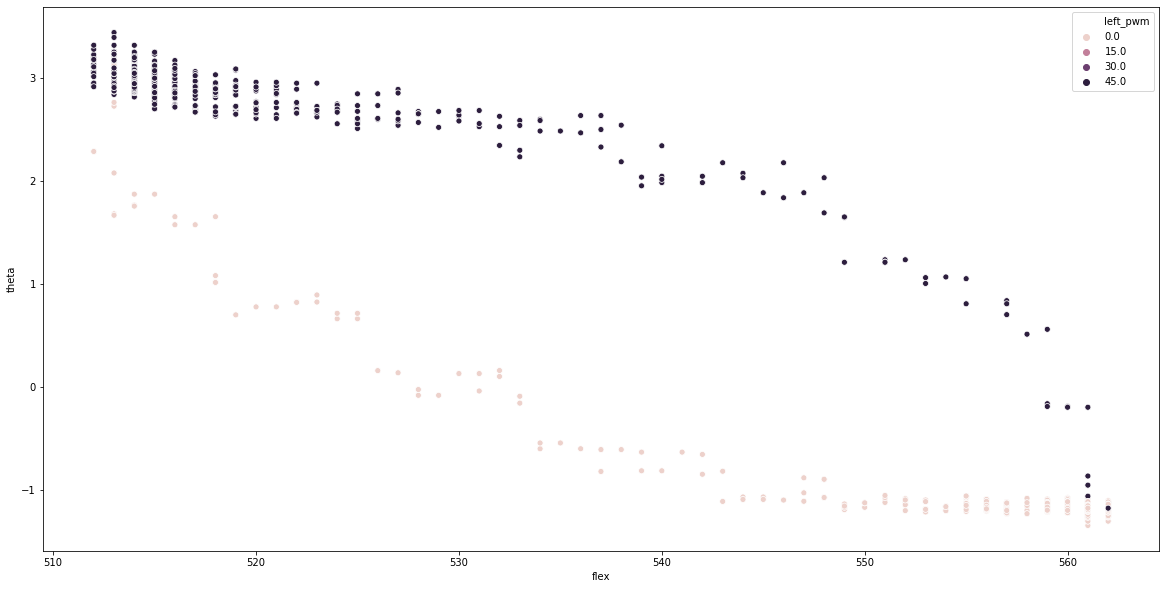

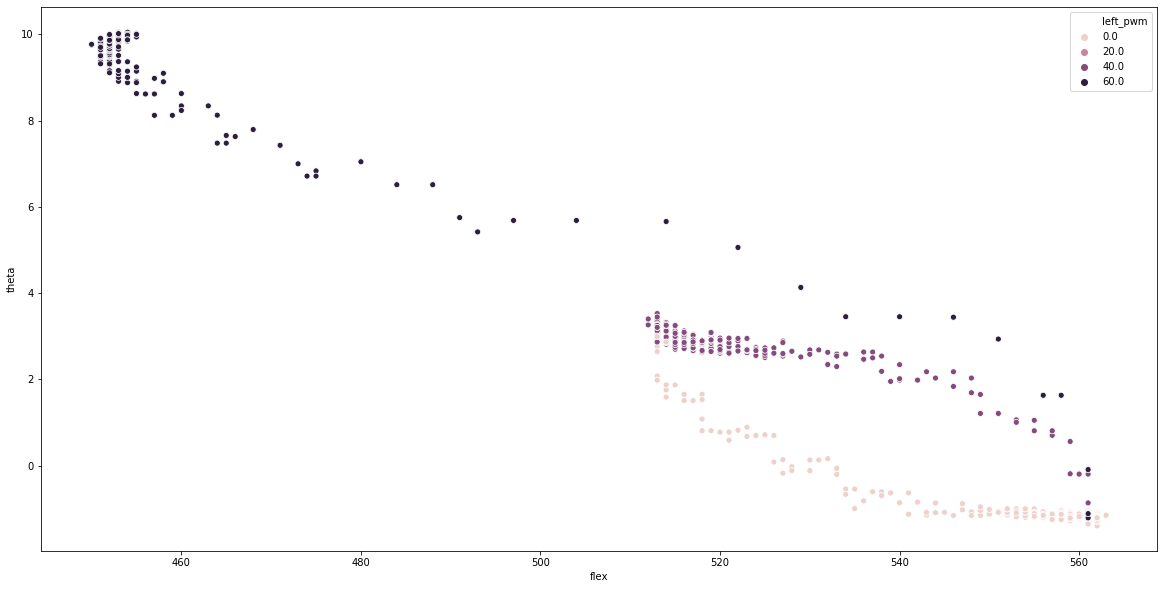

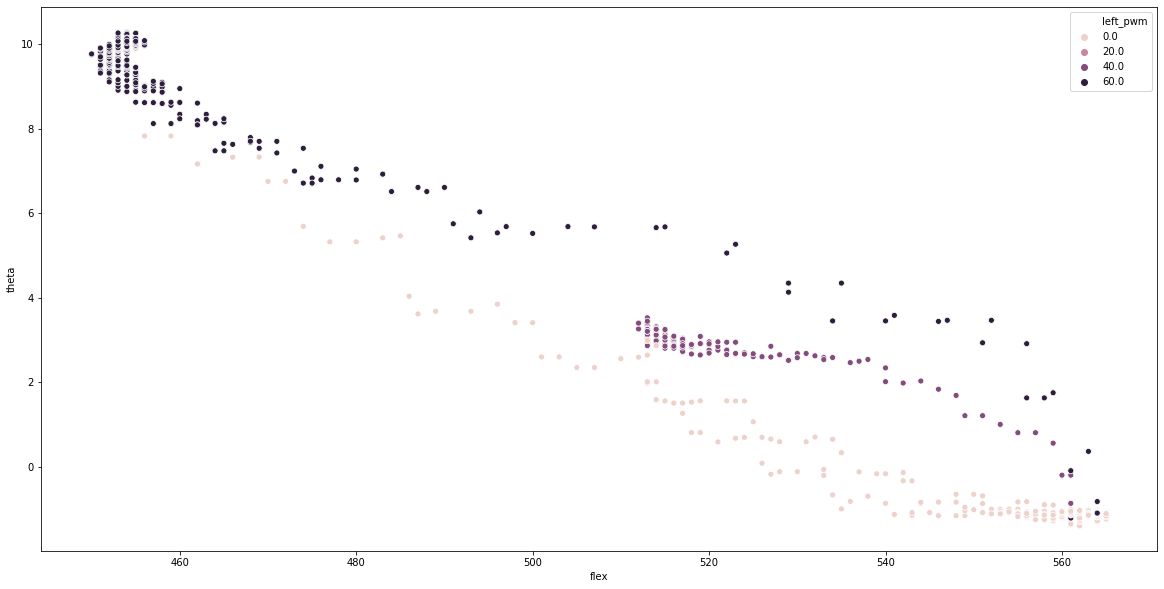

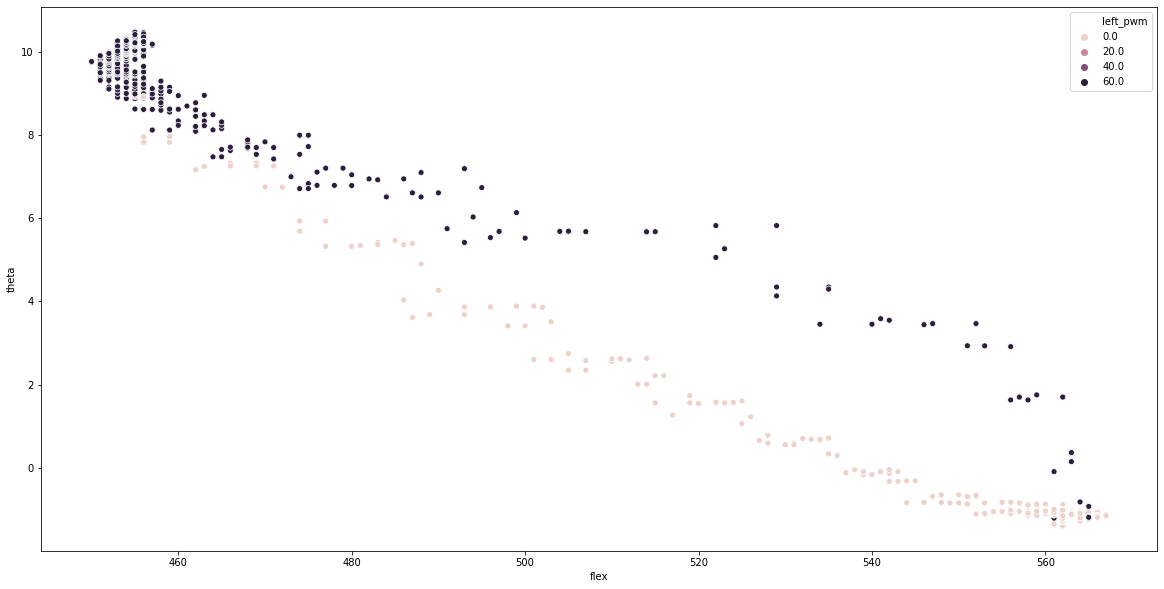

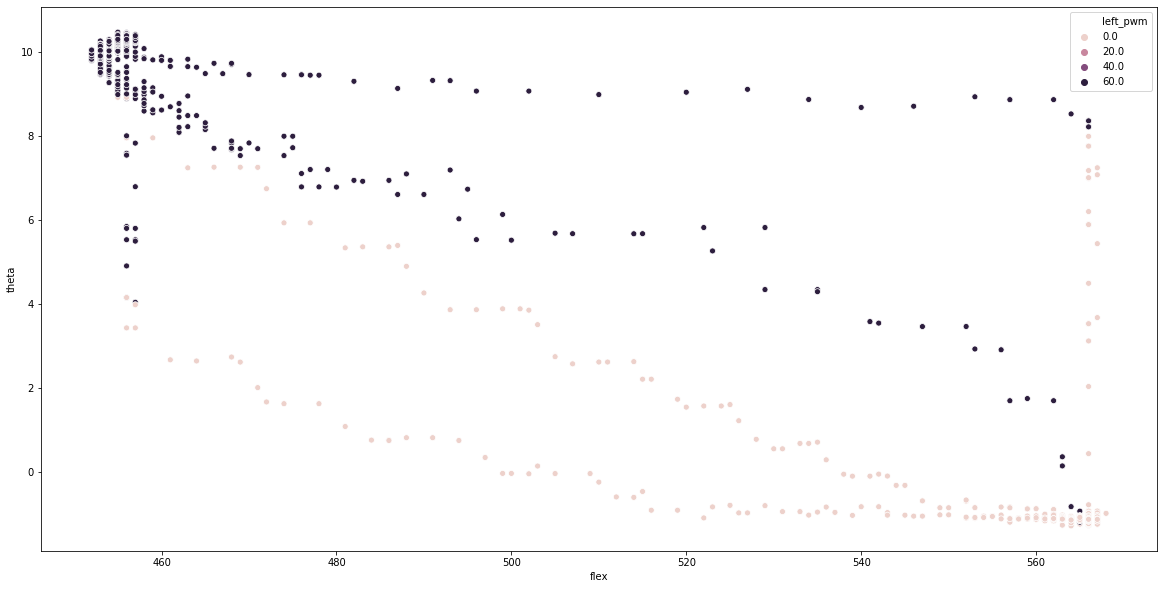

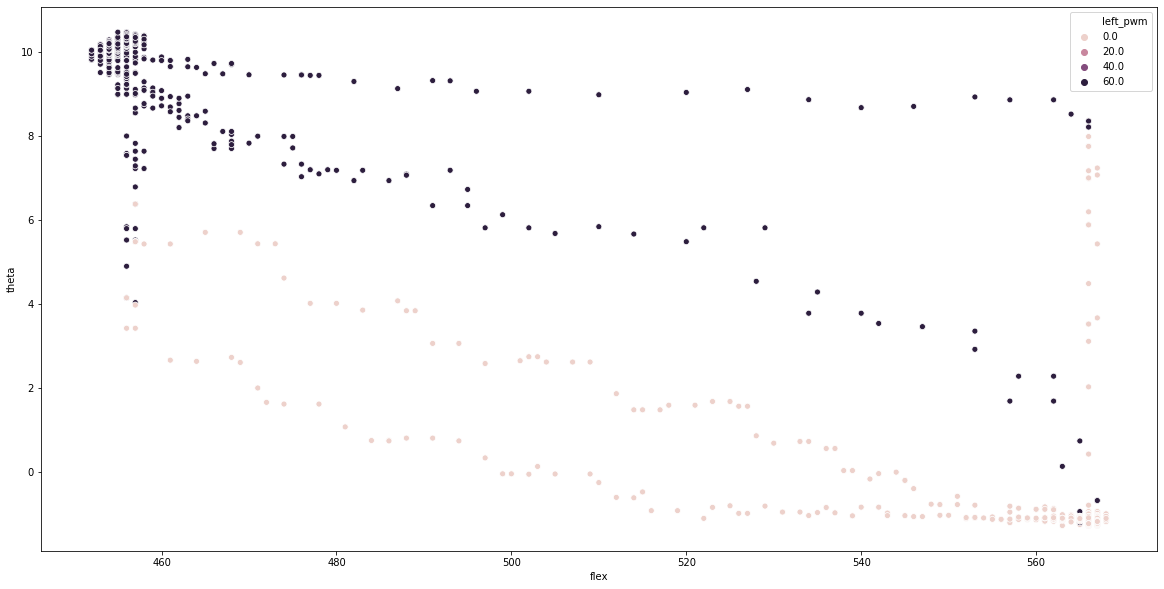

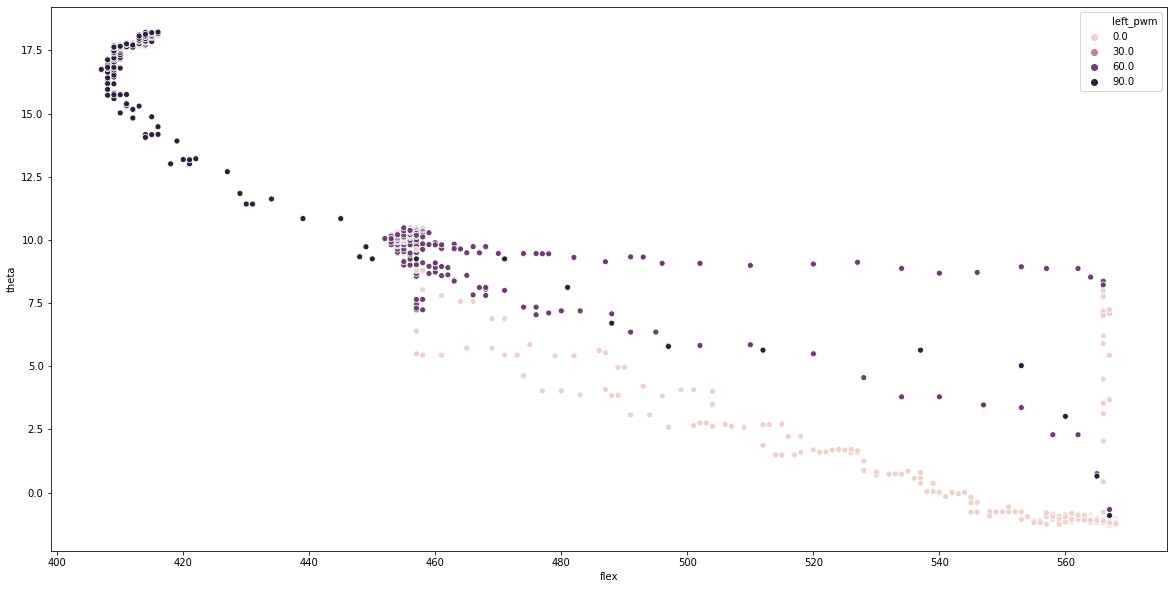

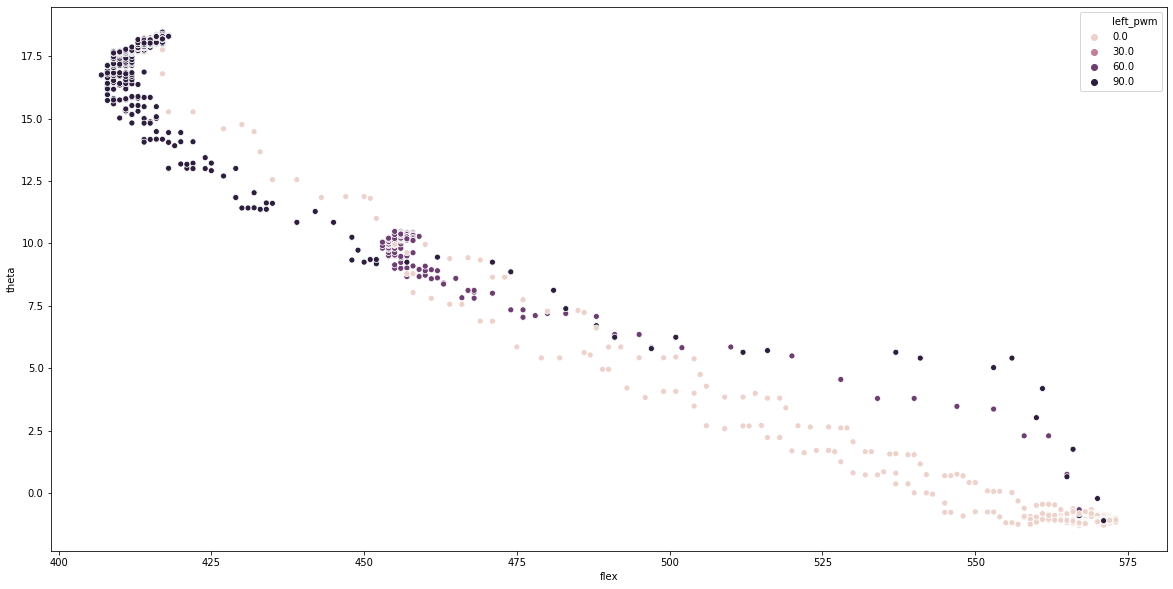

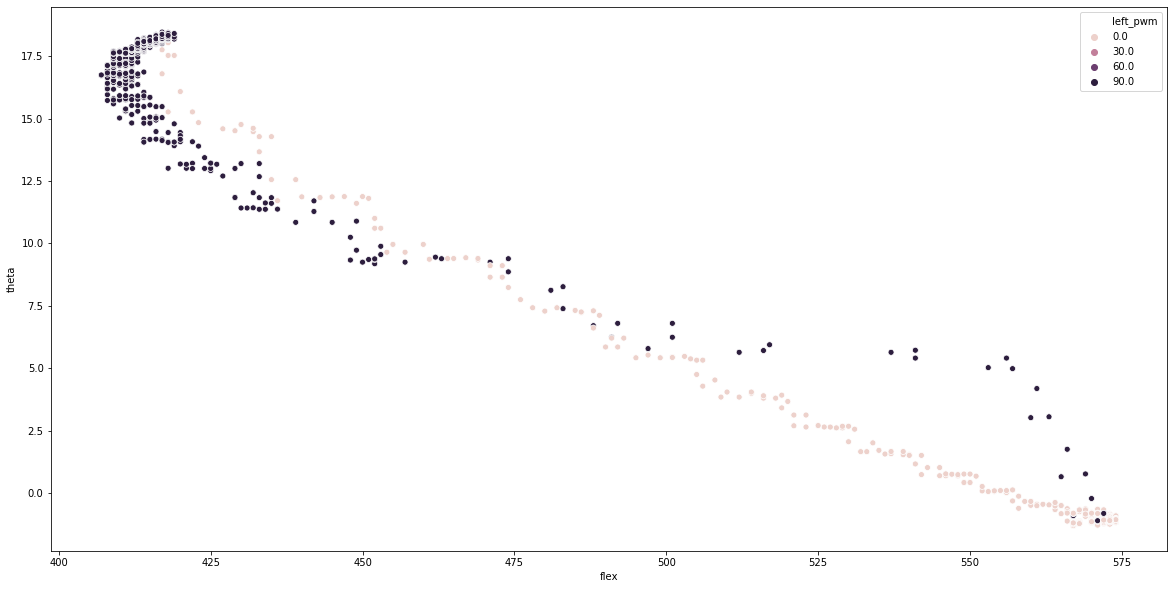

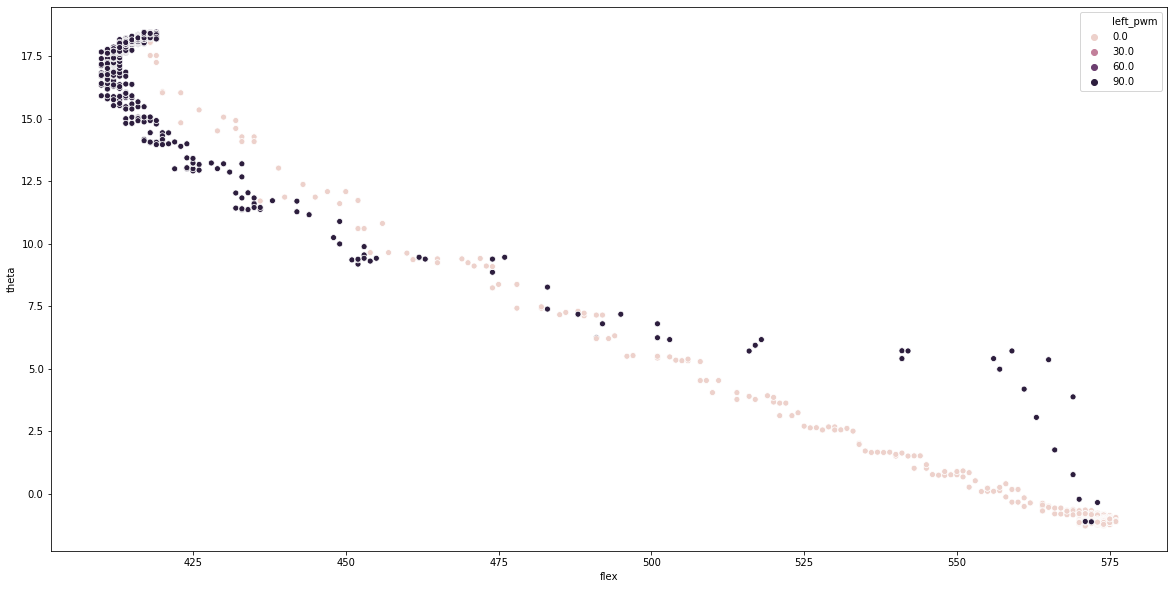

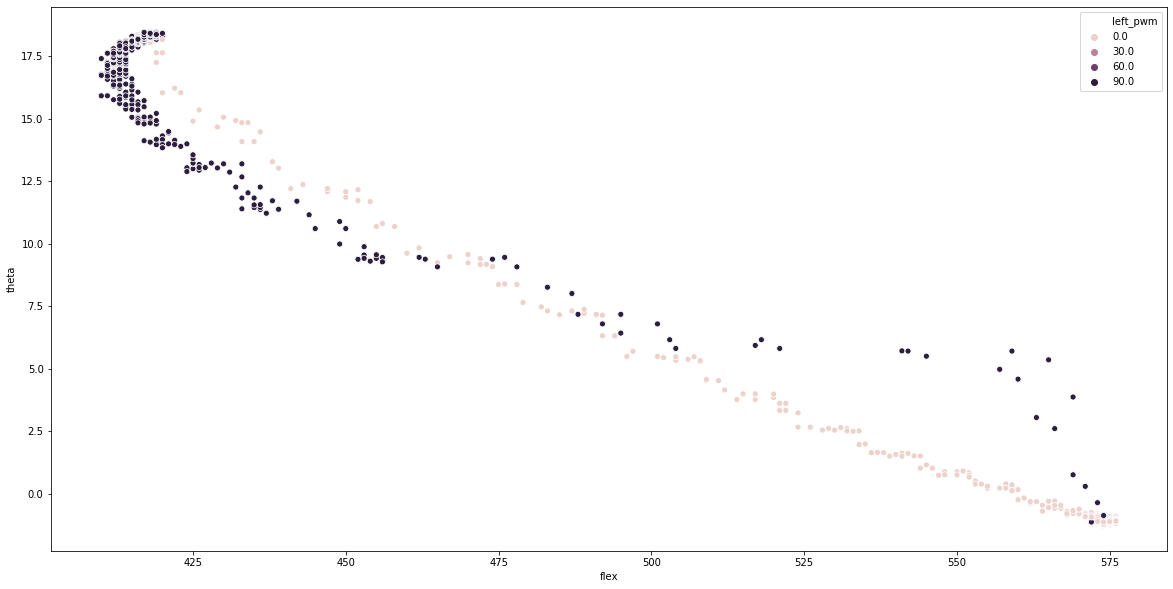

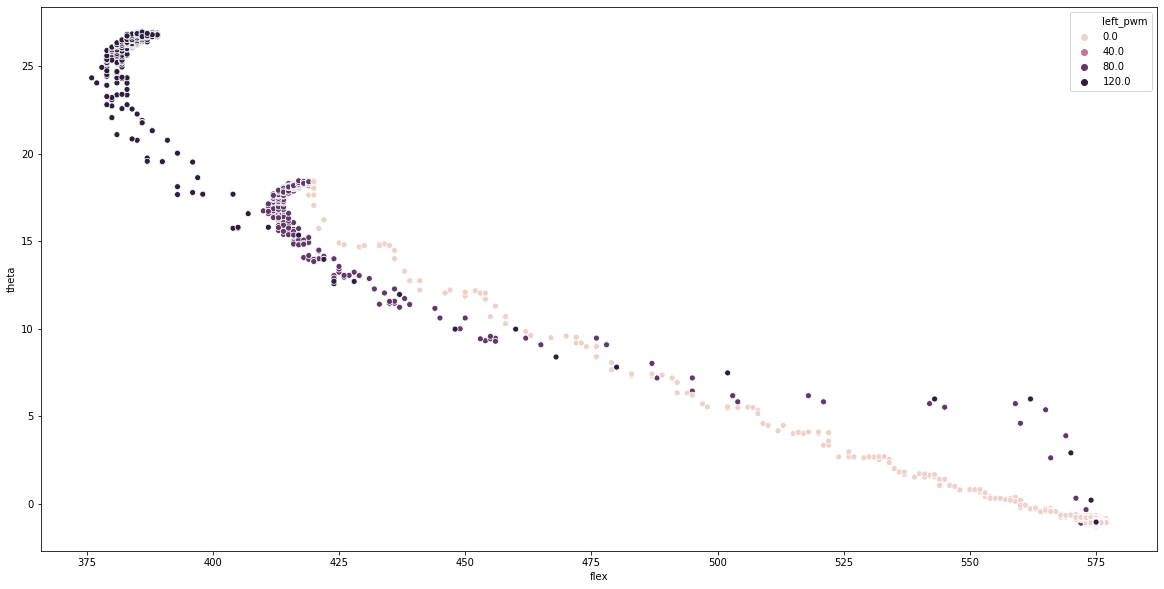

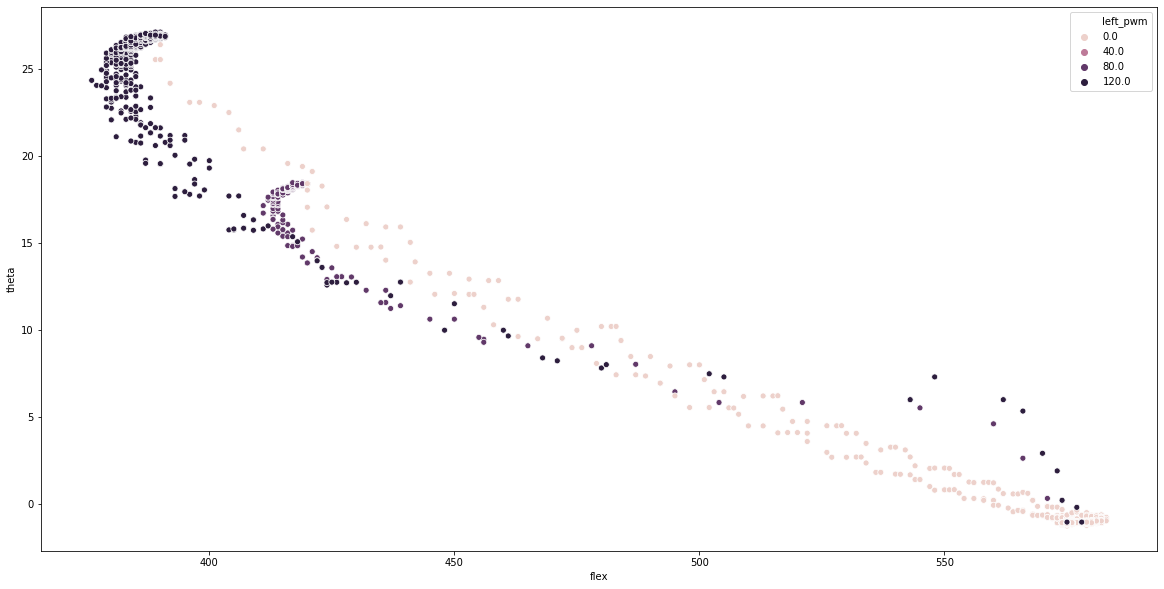

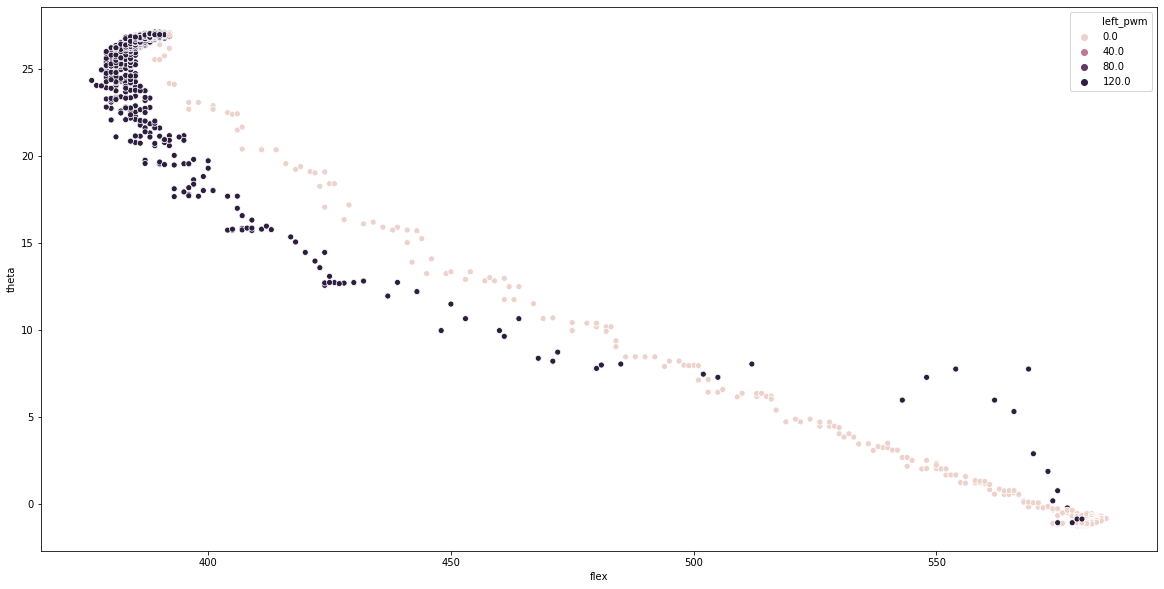

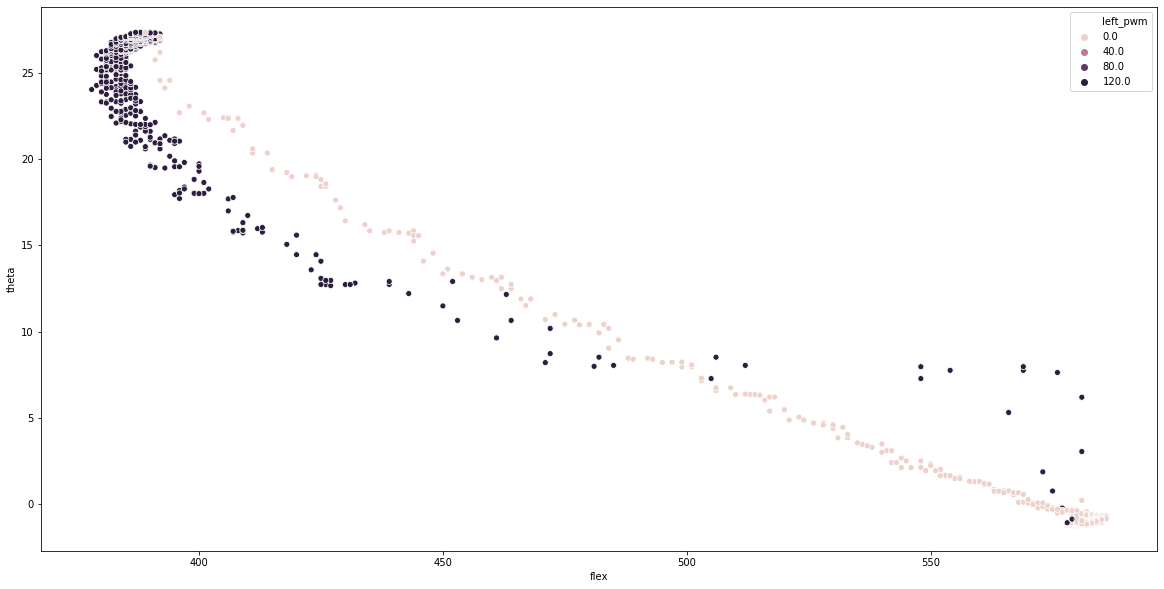

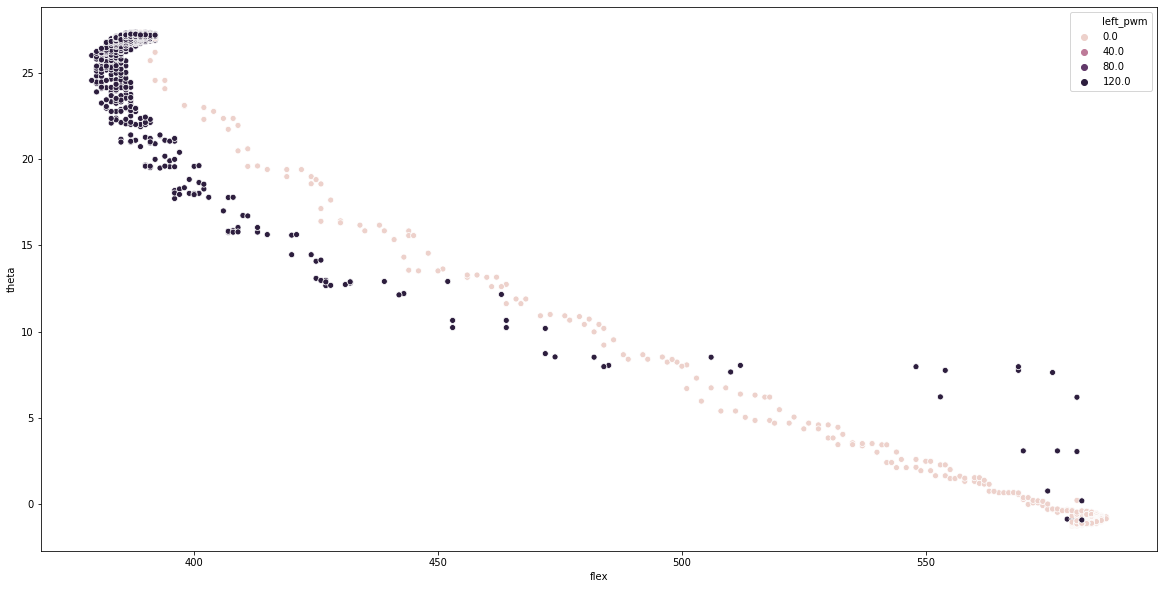

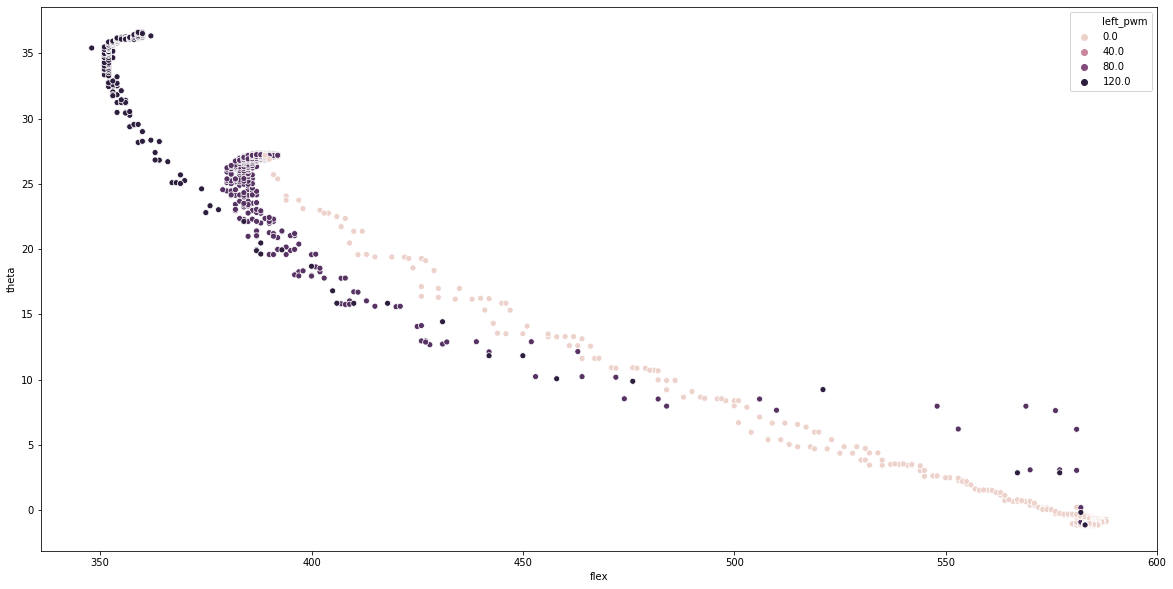

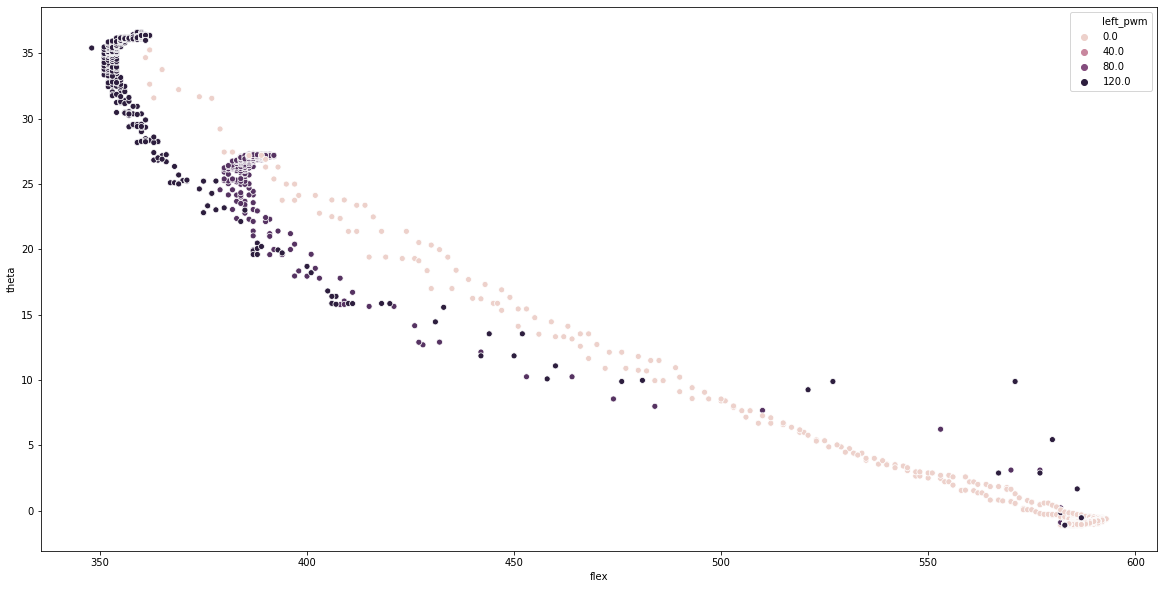

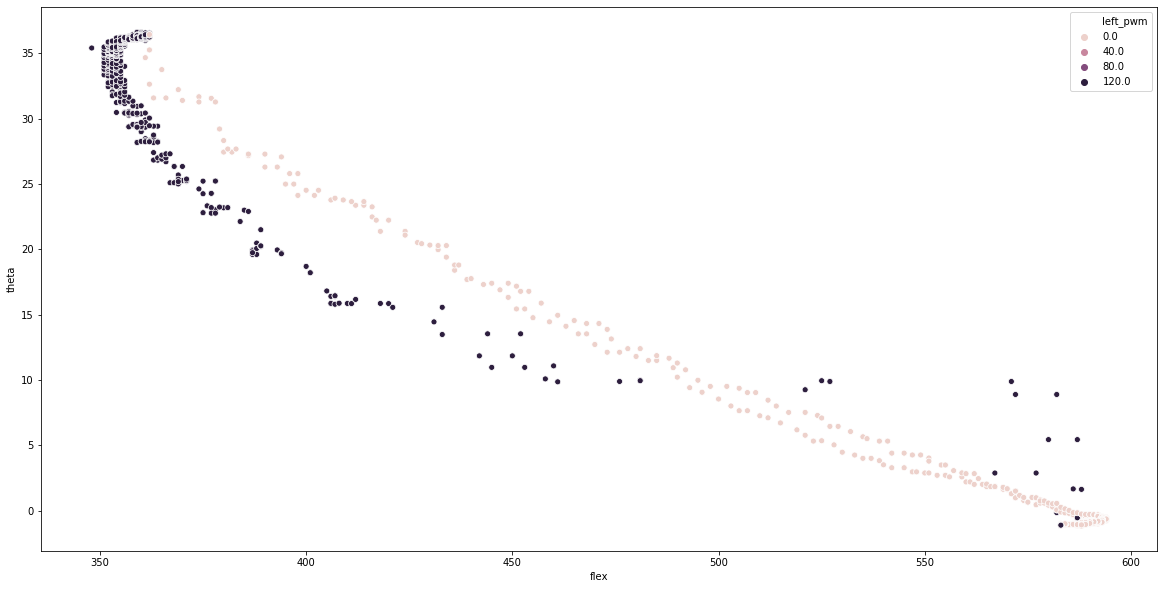

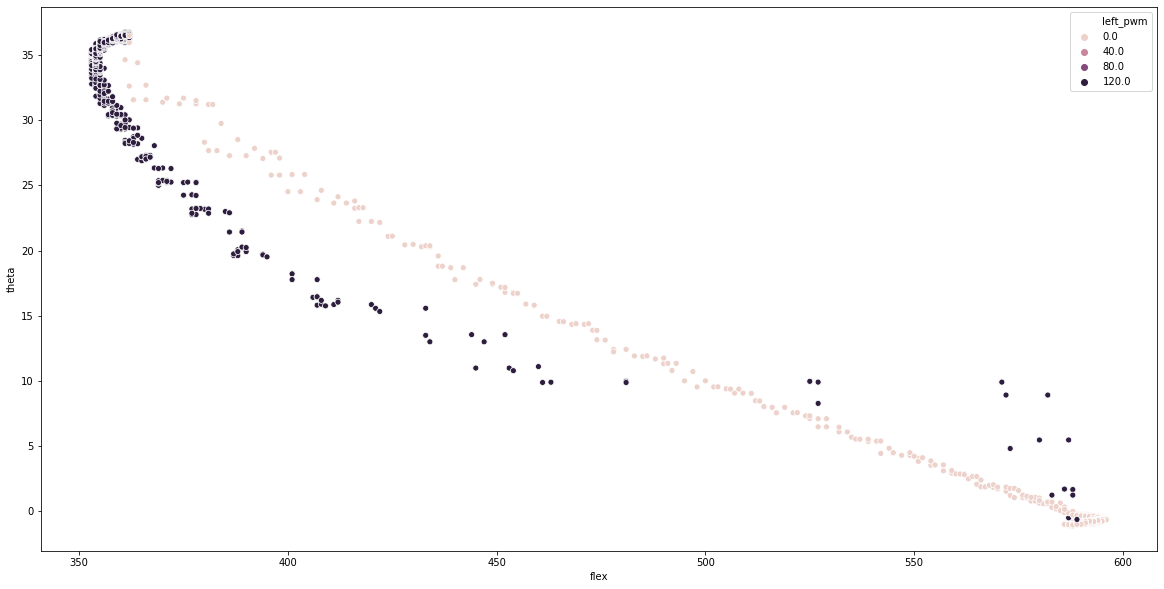

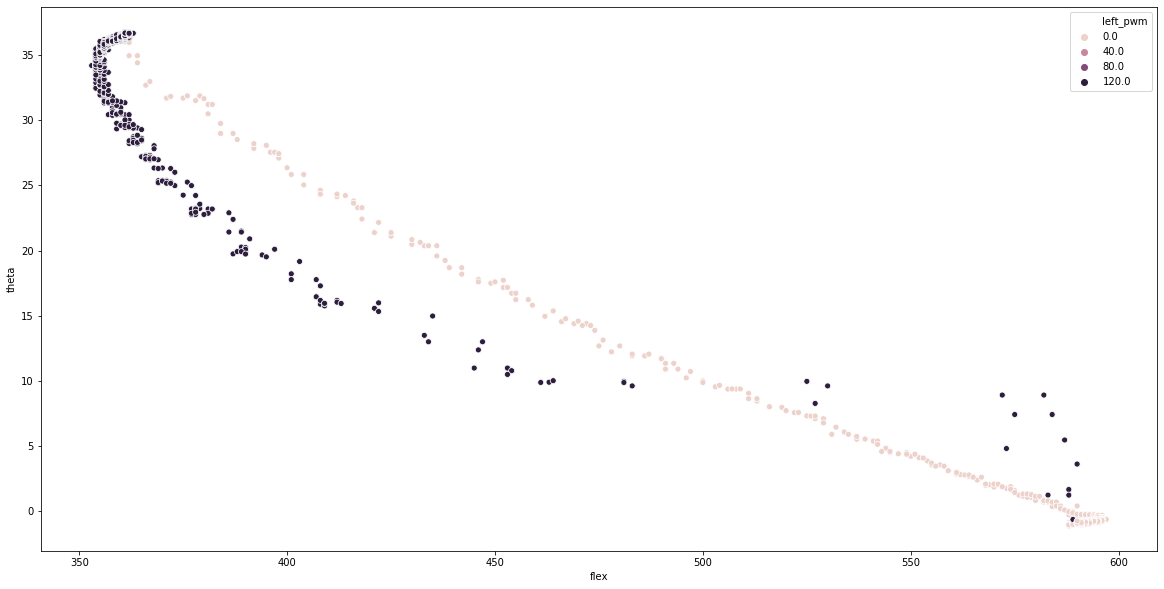

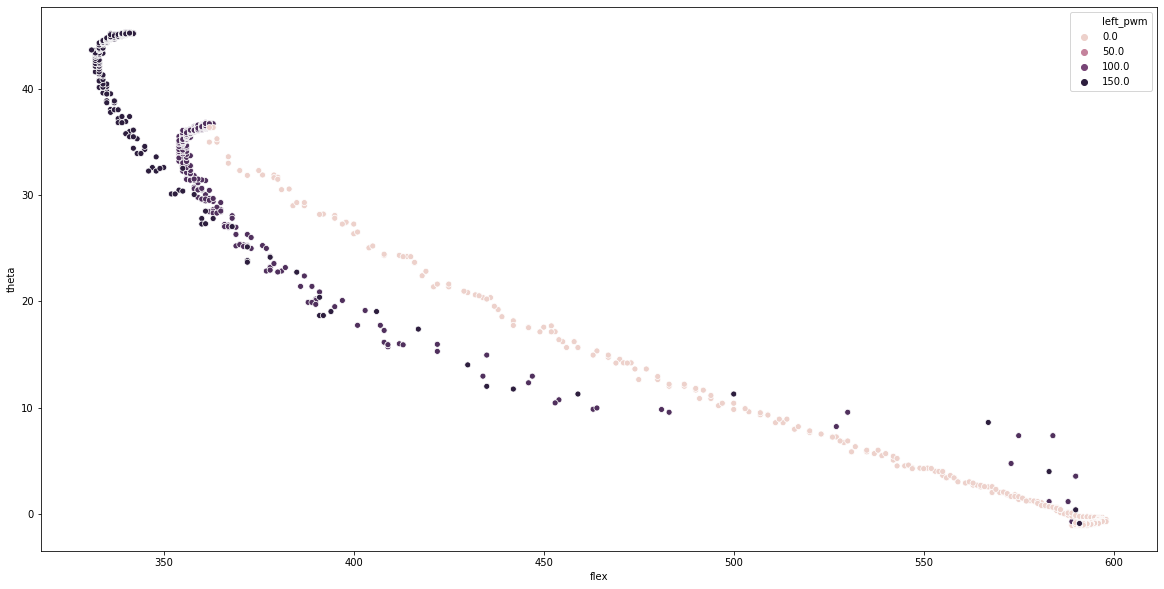

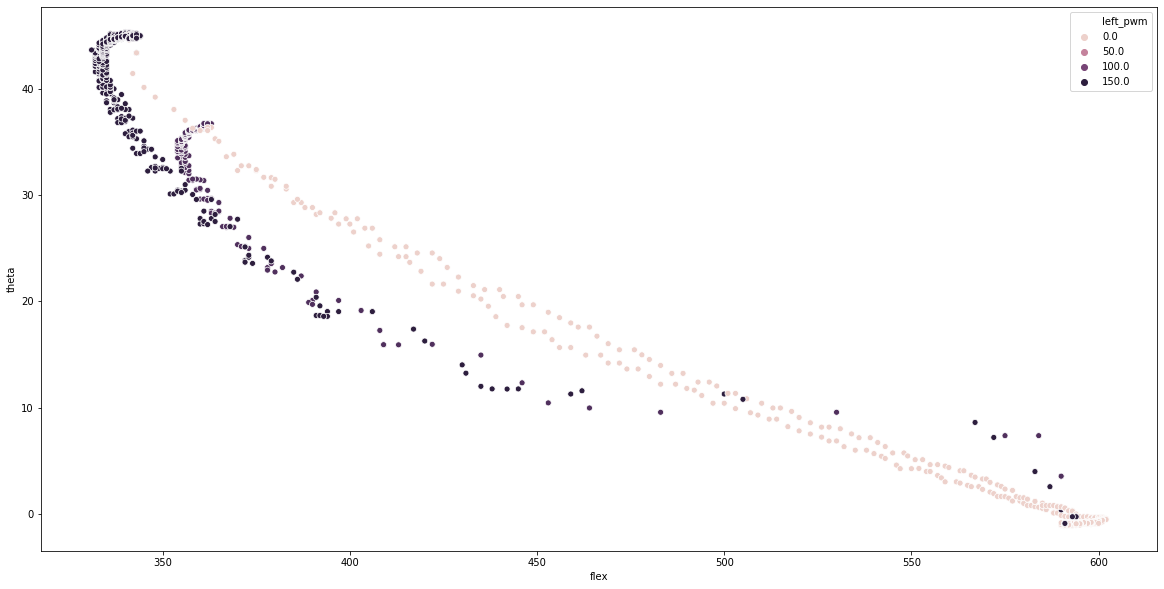

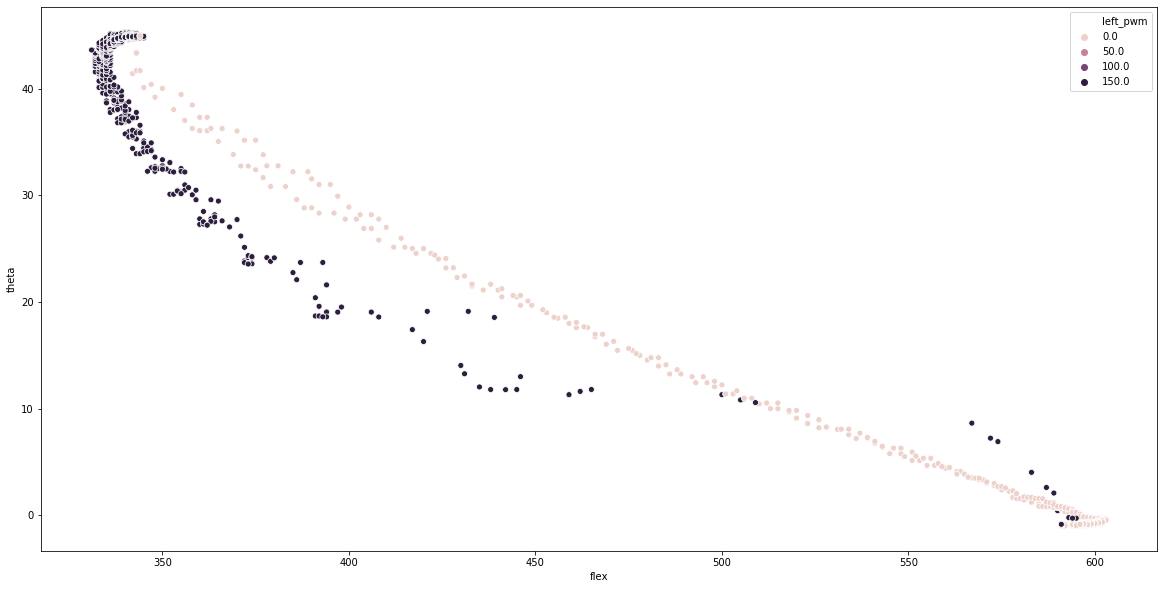

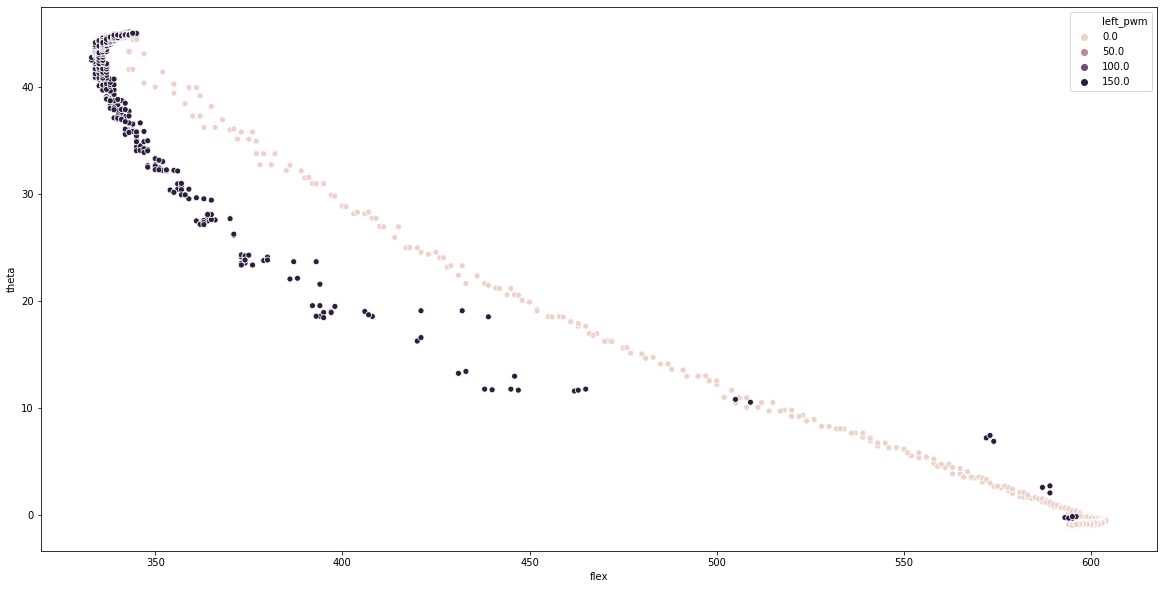

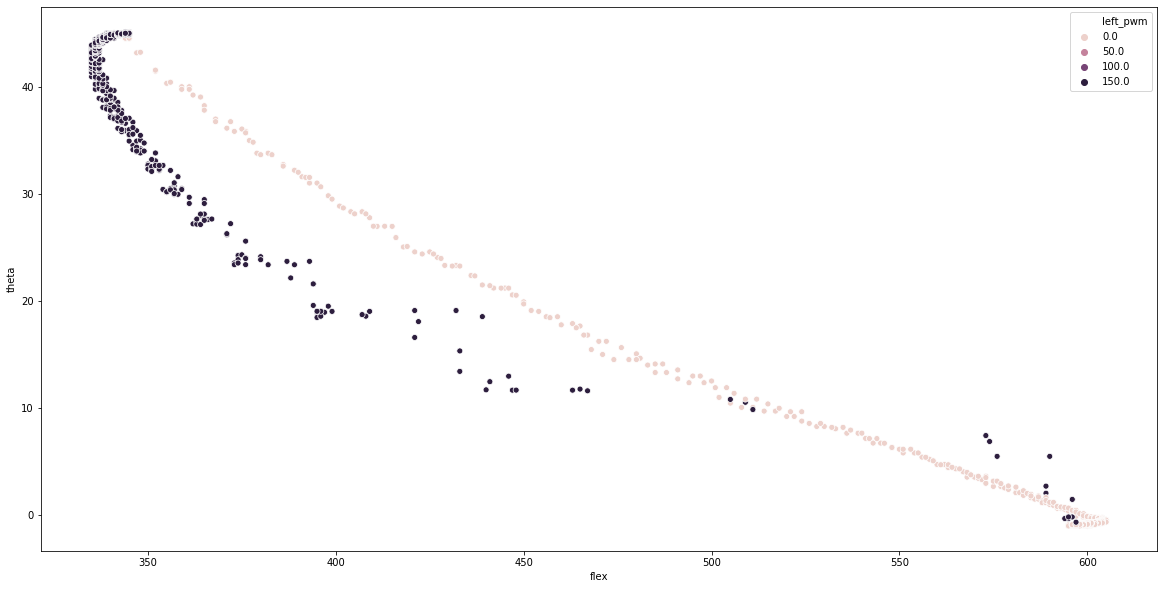

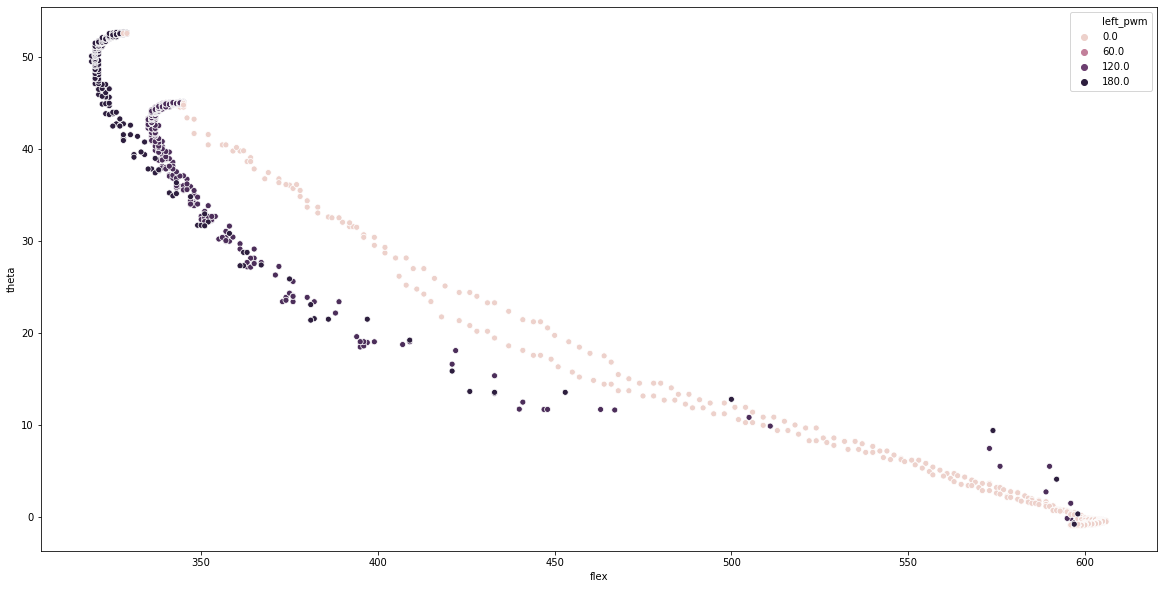

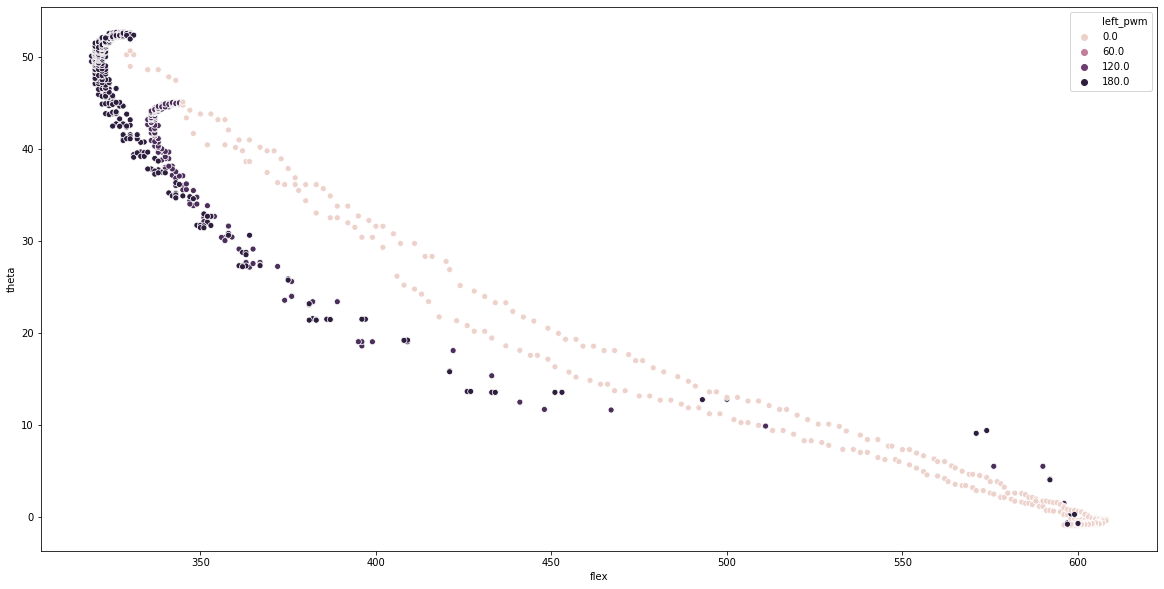

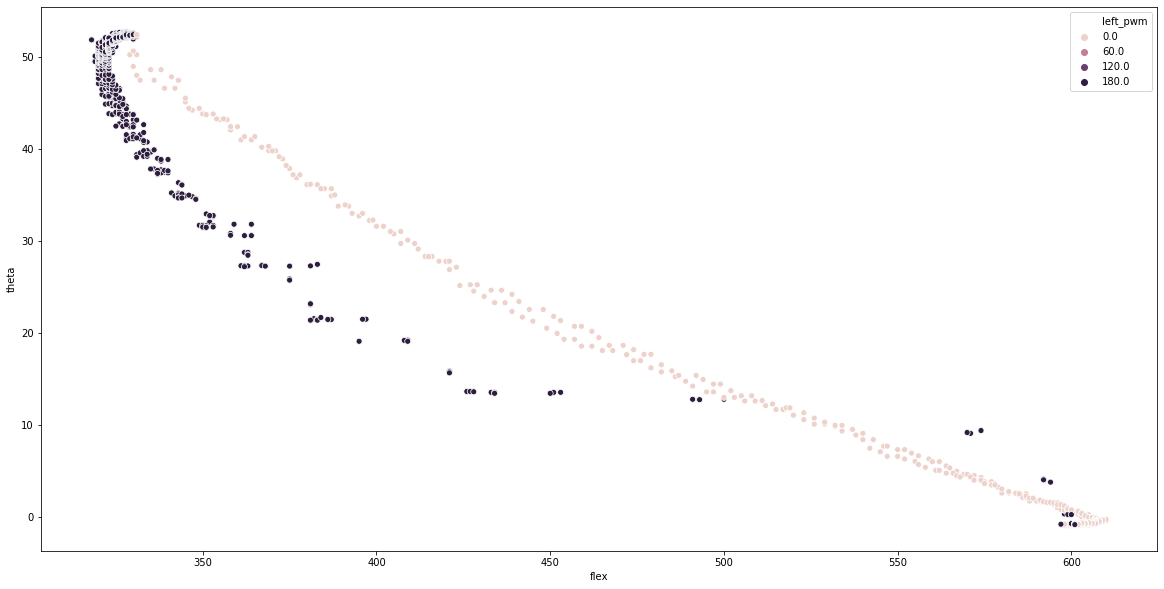

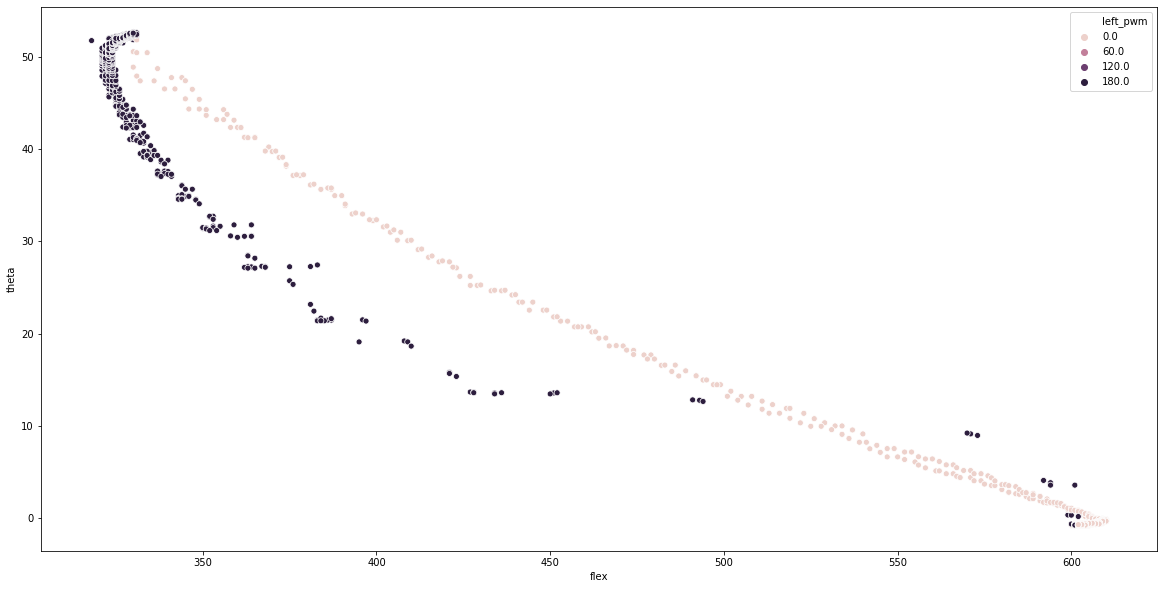

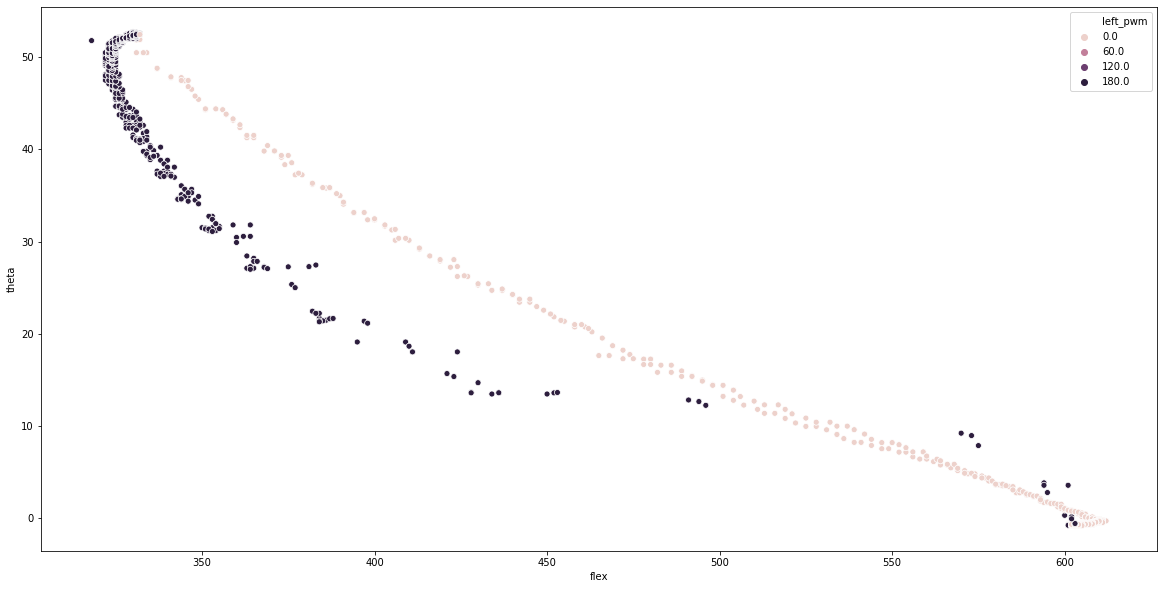

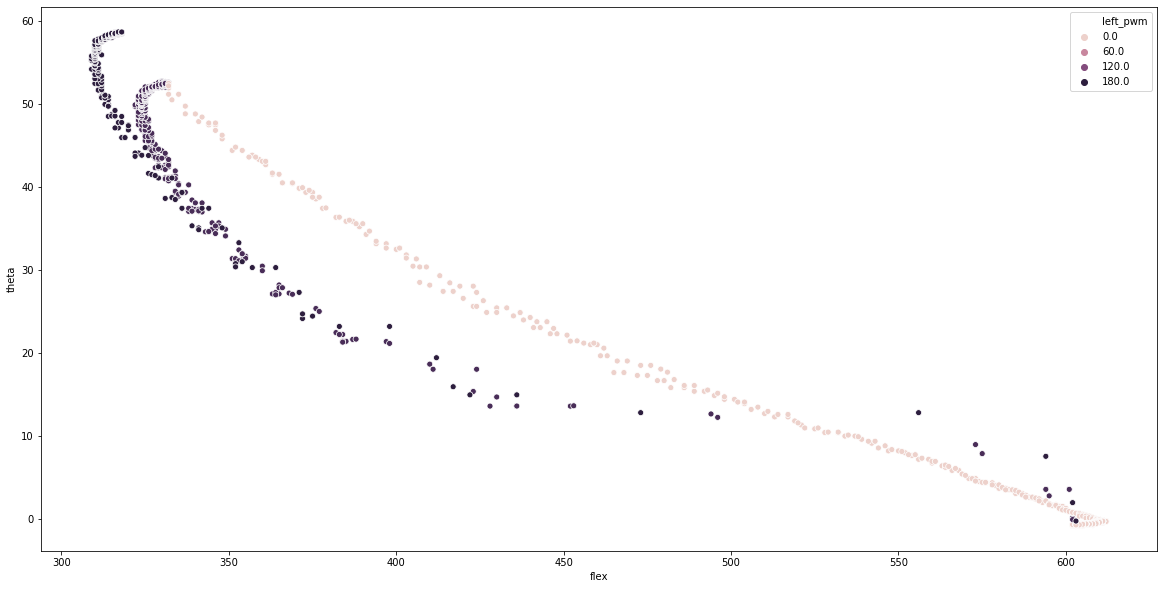

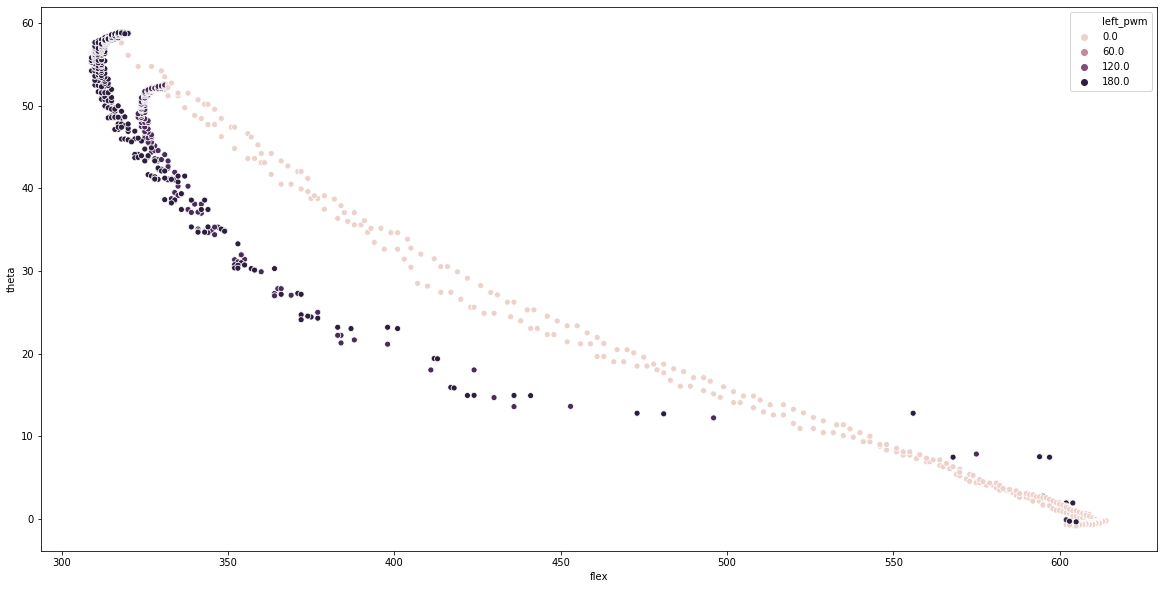

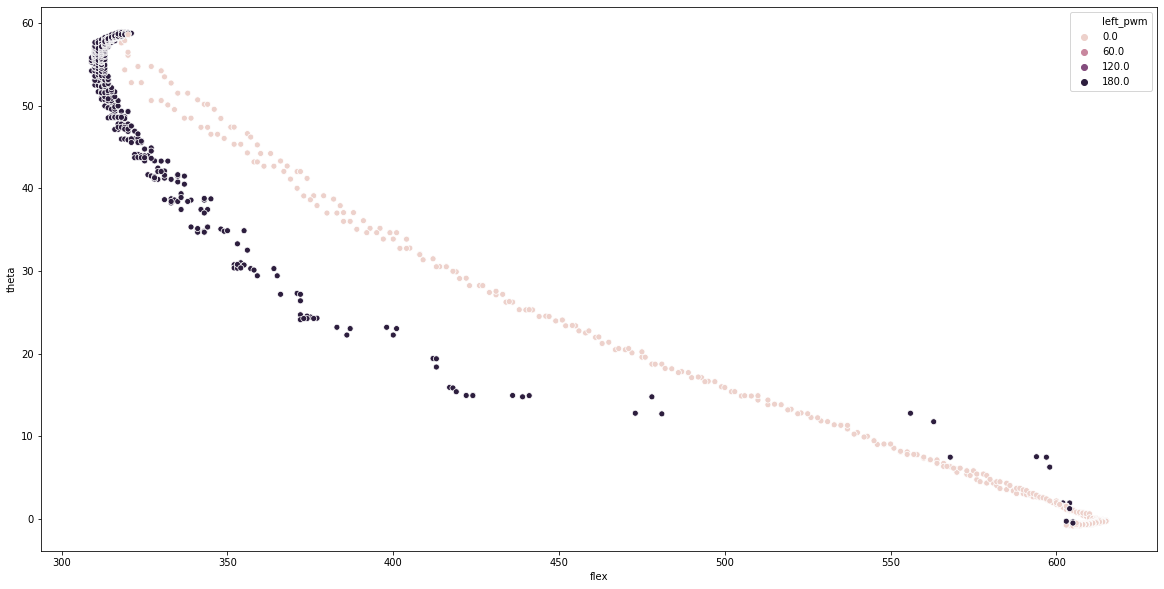

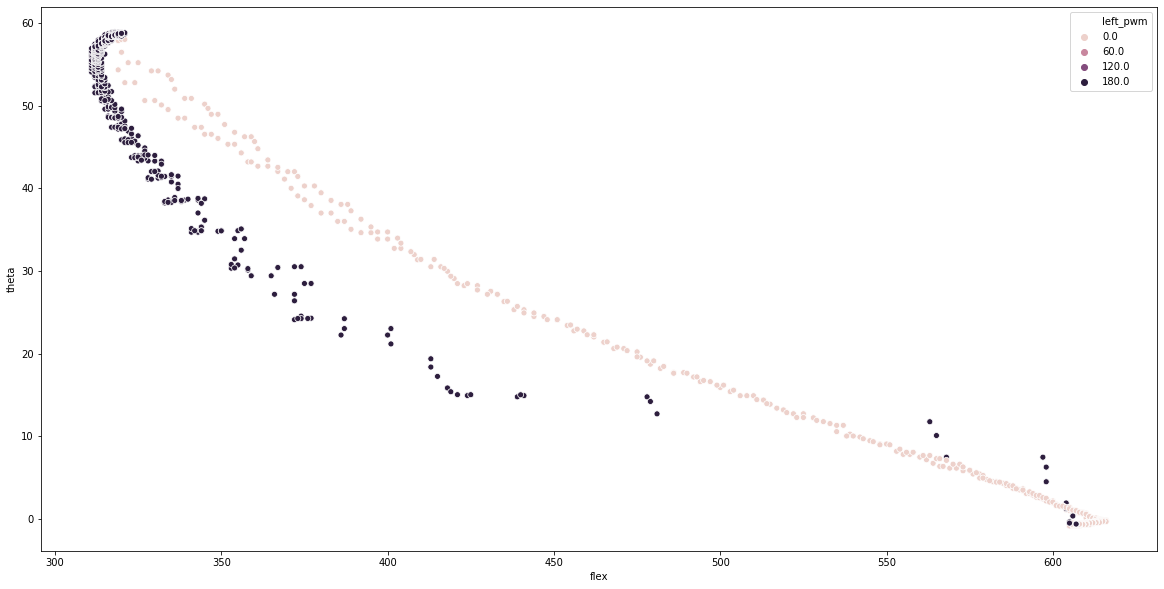

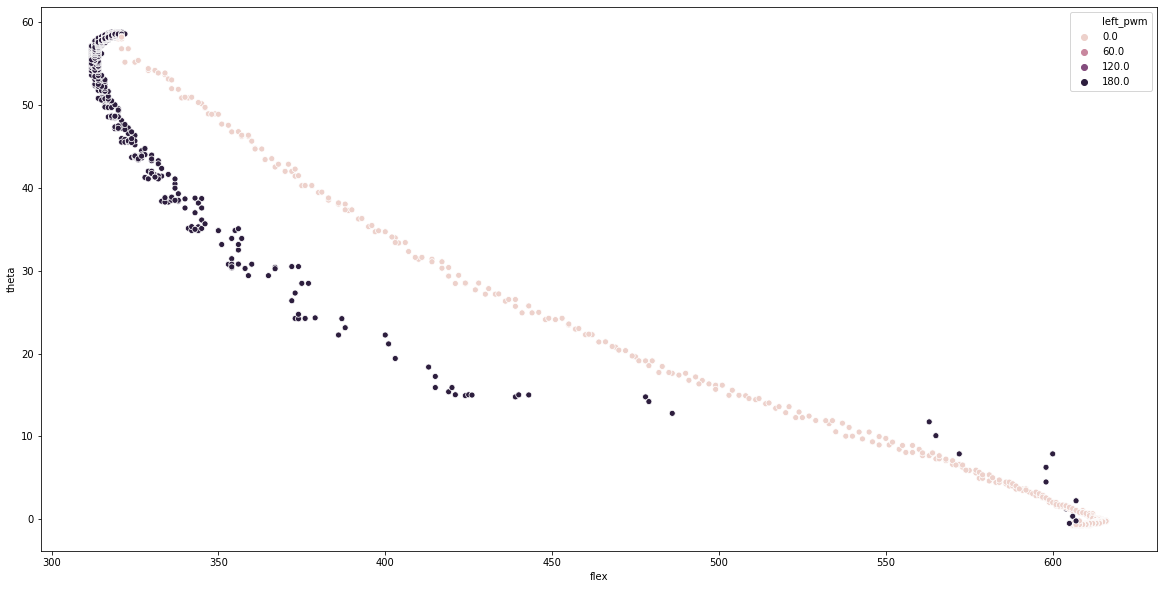

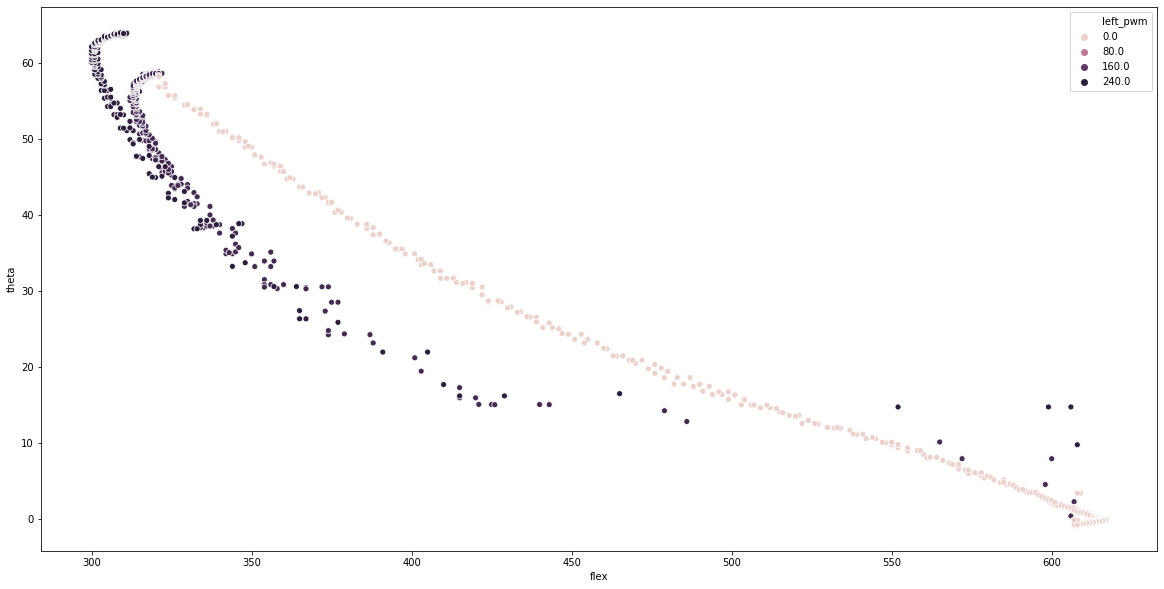

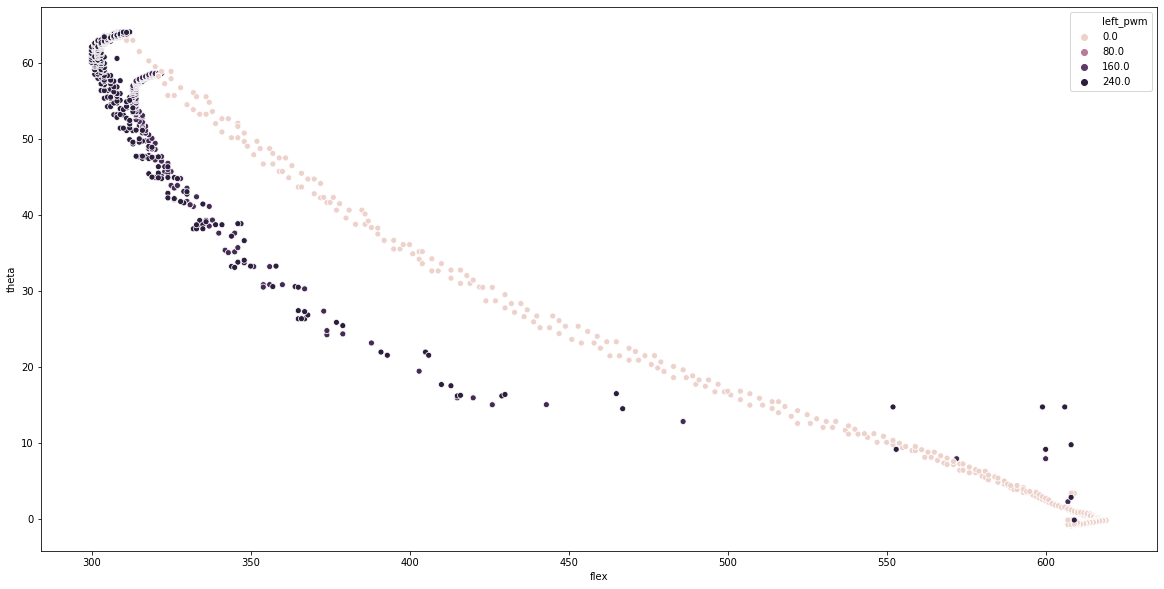

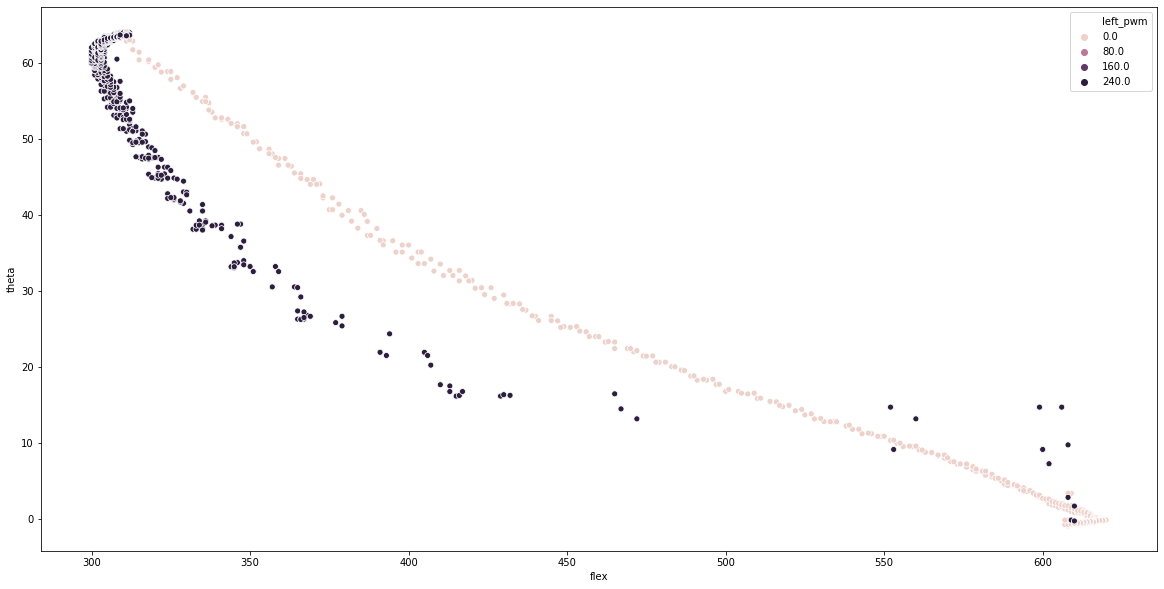

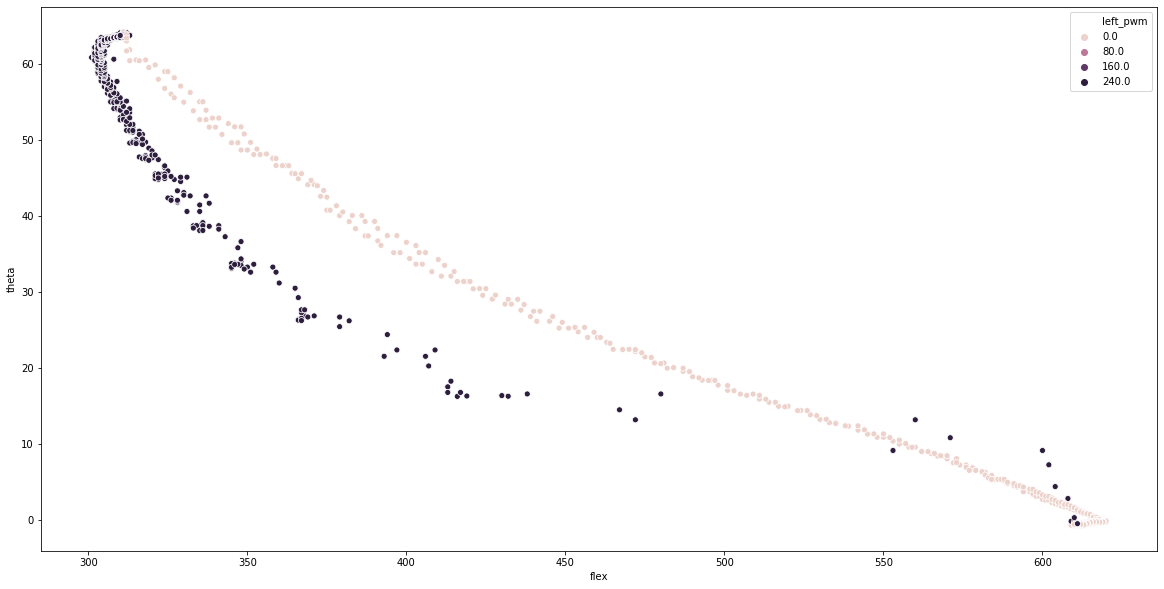

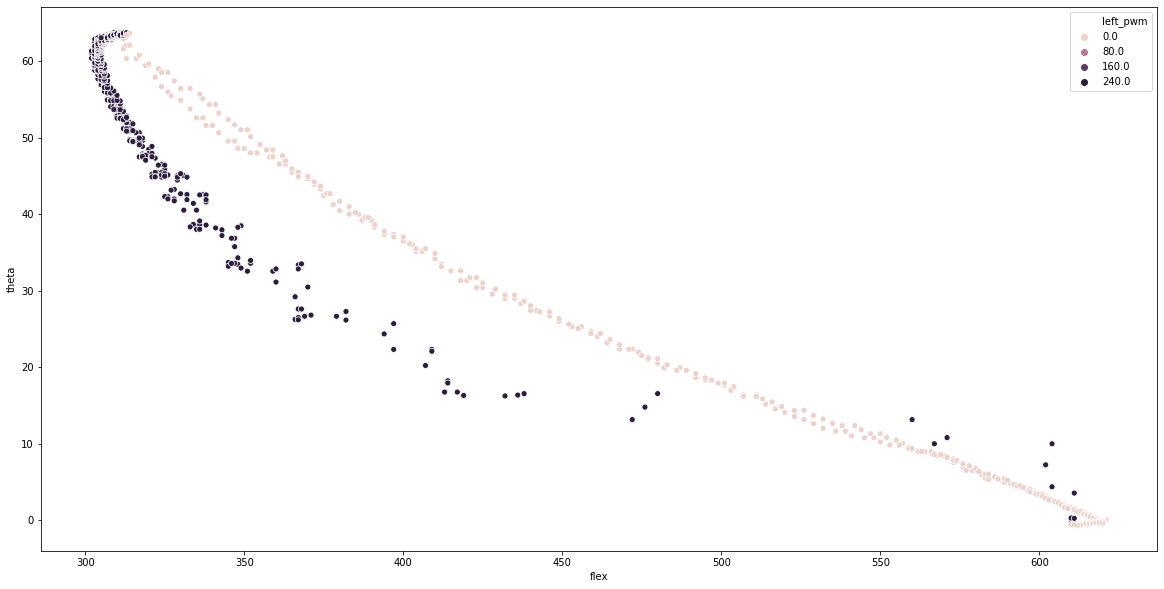

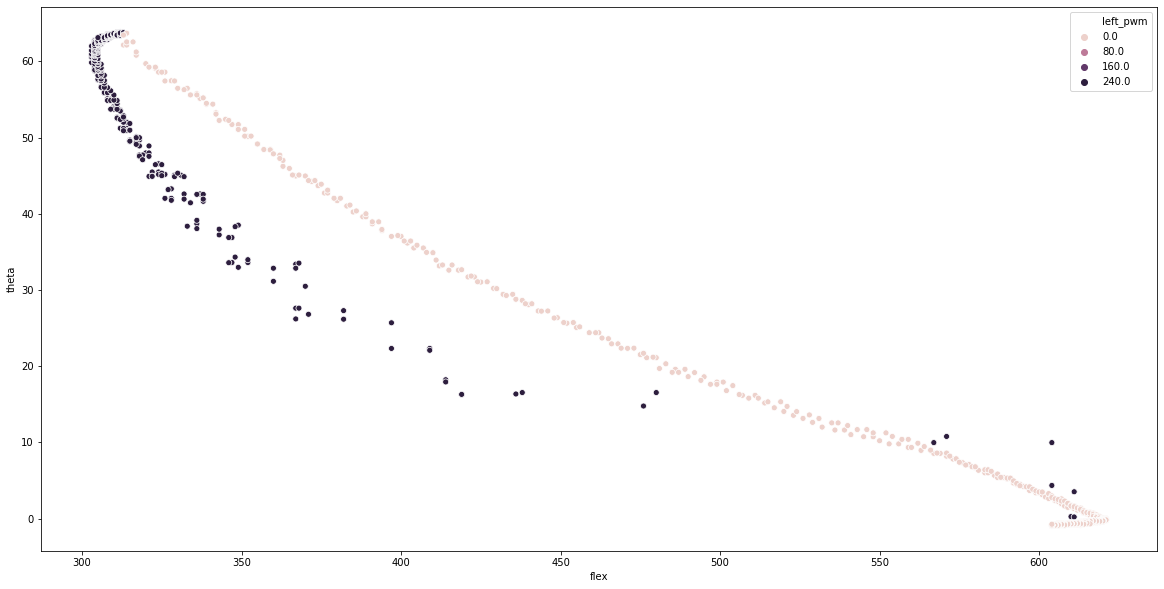

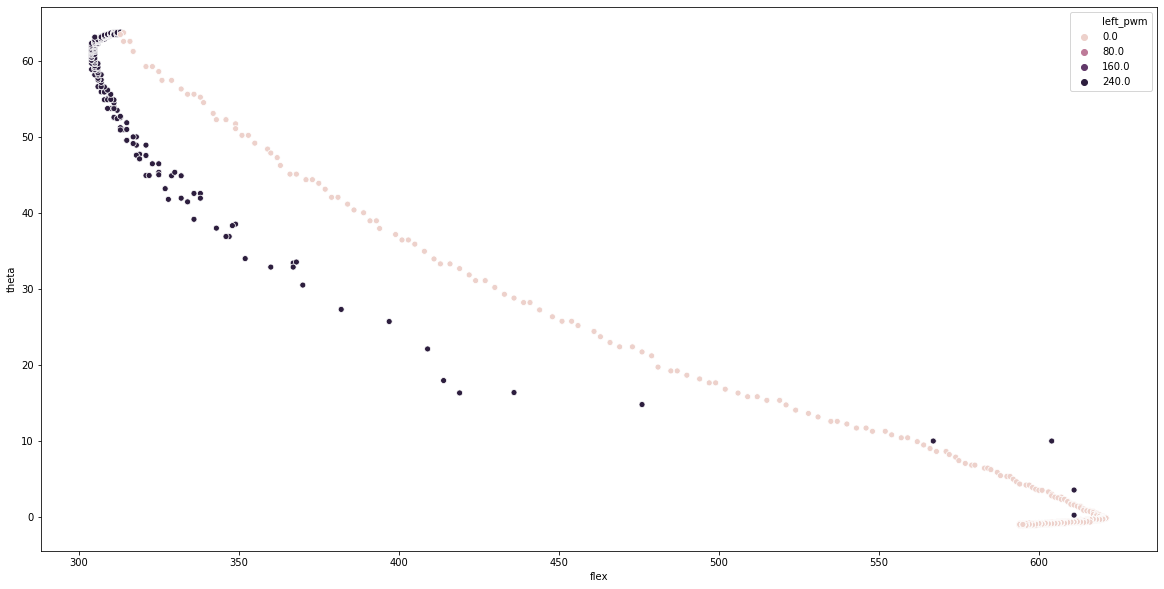

In [373]:
name = 'plot_'
count = 0
i = 0
alpha = ['a', 'b', 'c', 'd', 'e']
for pwm in pwms:
    if count % 5 == 0:
        i += 20
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x='flex', y='theta', hue='left_pwm', data=pwm)
    #plt.savefig(name + str(i) + alpha[count%5])
    count += 1

In [393]:
pwm_to_theta = []
count = 0
i = 0
for pwm in pwms_clean:
    if count % 5 == 0:
        i += 20
    p = i
    theta = np.mean(pwm.loc[pwm['theta'] > np.mean(pwm['theta'])]['theta'])
    pwm_to_theta.append([p, theta])
    count += 1

pwm_to_theta = np.array(pwm_to_theta)

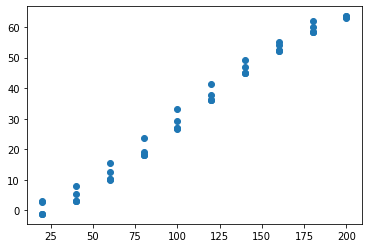

In [398]:
plt.scatter(pwm_to_theta.T[0], pwm_to_theta.T[1]) 